# Analysis of the autism data

In [2]:
run init.ipynb

Done.


# Dataset Illustration

In [228]:
#df = pd.read_csv("/home01/sam/df_all.csv")
df = pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")
# Data definition
data = Dataset(df=df, 
               missing_data_handling='encoding',
               imputation_method='without',
               sampling_method='without',
               scenario = None, 
               features_name = DEFAULT_PREDICTORS,
               scale_data=True, 
               use_missing_indicator_variables=False,
               verbosity=0, 
               proportion_train=1)

In [230]:
display(data.df.groupby('diagnosis').id.count())


diagnosis
0.0    1851
1.0     310
2.0      54
3.0      83
Name: id, dtype: int64

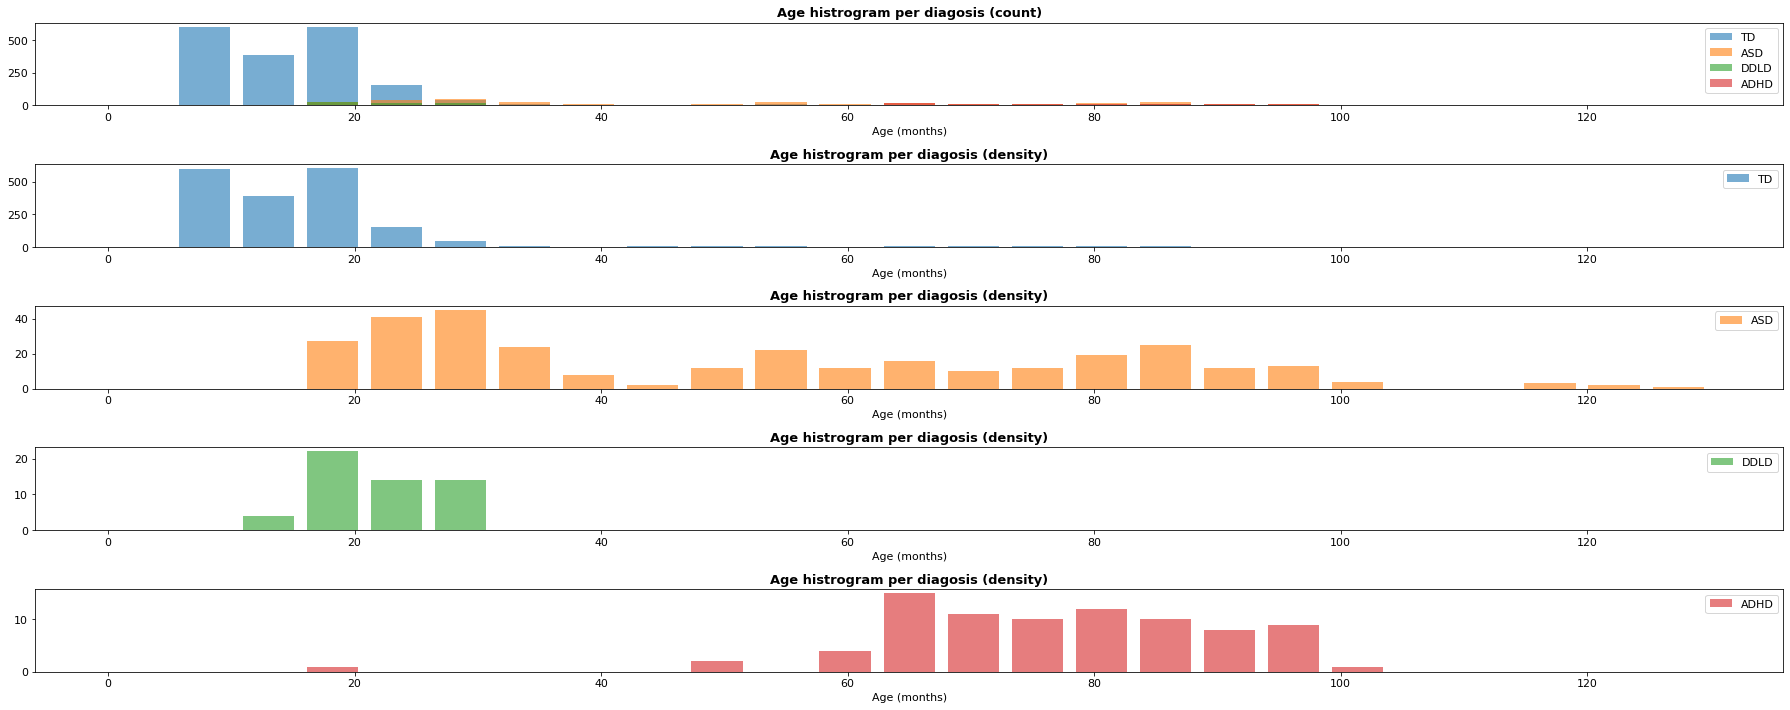

In [188]:

DIAG_DICT = {'TD':0., 
            'ASD':1., 
            'DDLD':2., 
            'ADHD':3.}
DIAG_DICT_REVERSE = {v: k for k, v in DIAG_DICT.items()}

colors = {'TD':'#1f77b4',
          'ASD': '#ff7f0e',
          'DDLD':'#2ca02c',
          'ADHD':'#d62728',
          'comorbid':'#9467bd'}
           
    
fig, axes = plt.subplots(5, 1, figsize=(25, 10)); axes=axes.flatten()

for i, d in df.groupby('diagnosis'):
    axes[0].hist(d['age'], bins=np.linspace(0, 130, 26), density=False, alpha=.6, rwidth=.8, color=colors[DIAG_DICT_REVERSE[i]], label=DIAG_DICT_REVERSE[i])
axes[0].legend(); axes[0].set_title("Age histrogram per diagosis (count)", weight='bold', fontsize=13); axes[0].set_xlabel("Age (months)")

for i, d in df.groupby('diagnosis'):
    axes[int(i+1)].hist(d['age'], bins=np.linspace(0, 130, 26), density=False, alpha=.6, rwidth=.8, color=colors[DIAG_DICT_REVERSE[i]], label=DIAG_DICT_REVERSE[i])
    axes[int(i+1)].legend(); axes[int(i+1)].set_title("Age histrogram per diagosis (density)", weight='bold', fontsize=13);axes[int(i+1)].set_xlabel("Age (months)")
plt.tight_layout()

data.split_test_train()

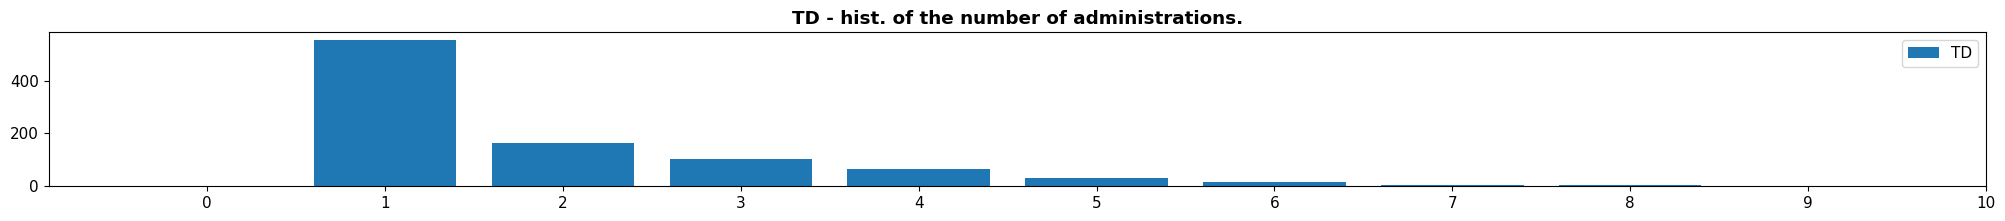

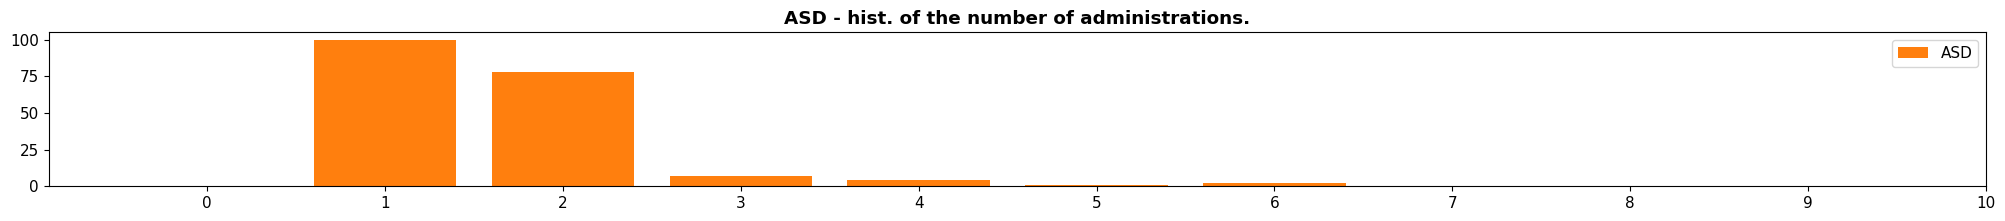

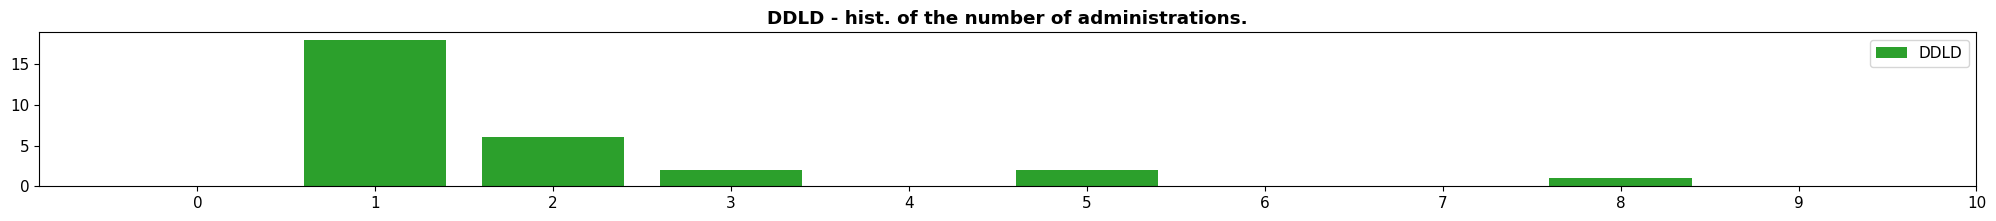

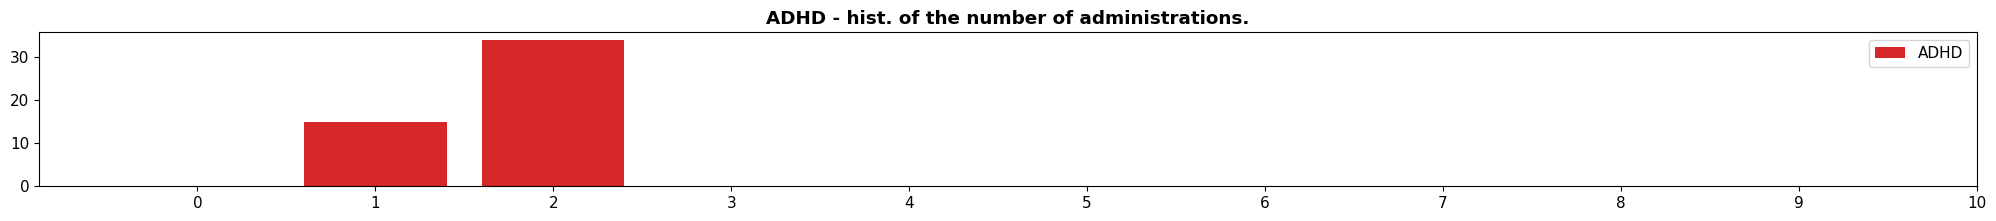

In [54]:
for i, d in df.groupby('diagnosis'):
    plt.figure(figsize=(25, 2)), 
    plt.hist(d.groupby("id")['diagnosis'].count().to_numpy(), bins = np.linspace(0, 10 , 11), rwidth=.8,color=colors[DIAG_DICT_REVERSE[i]], label=DIAG_DICT_REVERSE[i])
    plt.xticks(ticks=np.linspace(0, 10 , 11)+.5, labels=np.linspace(0, 10 , 11).astype(int));plt.legend()
    plt.title("{} - hist. of the number of administrations.".format(DIAG_DICT_REVERSE[i]), weight='bold')

<AxesSubplot:title={'center':'Percentage of missing values per feature'}>

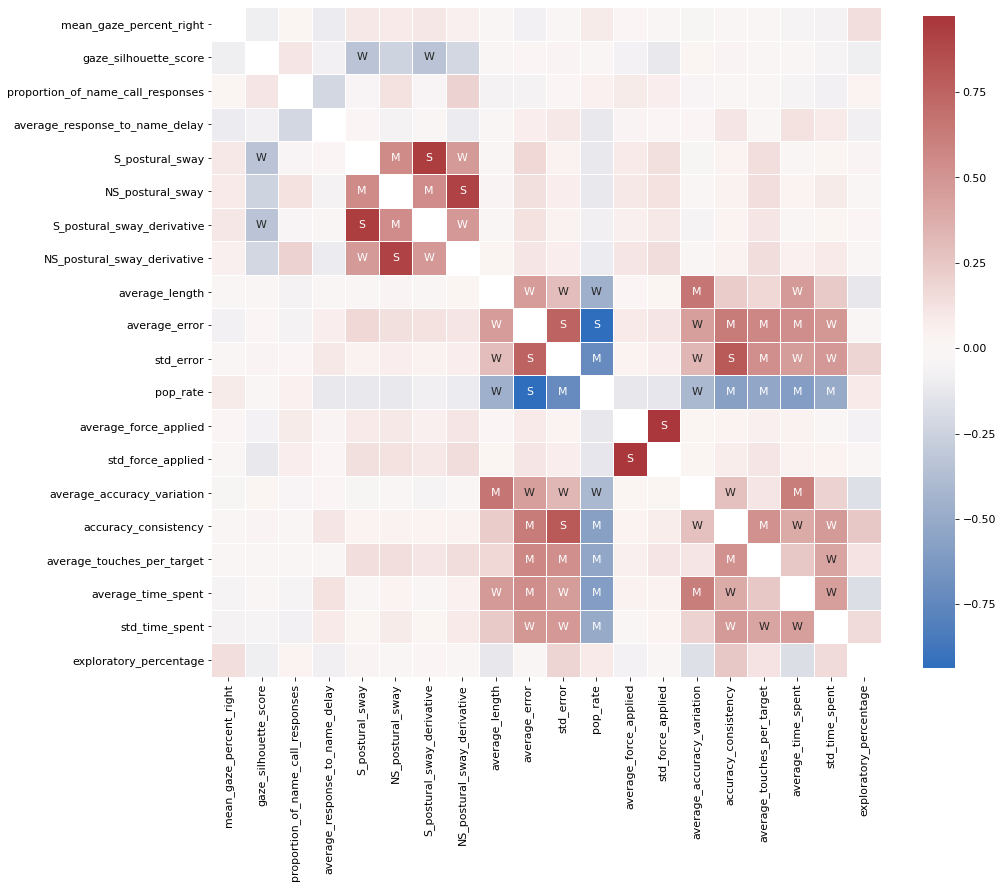

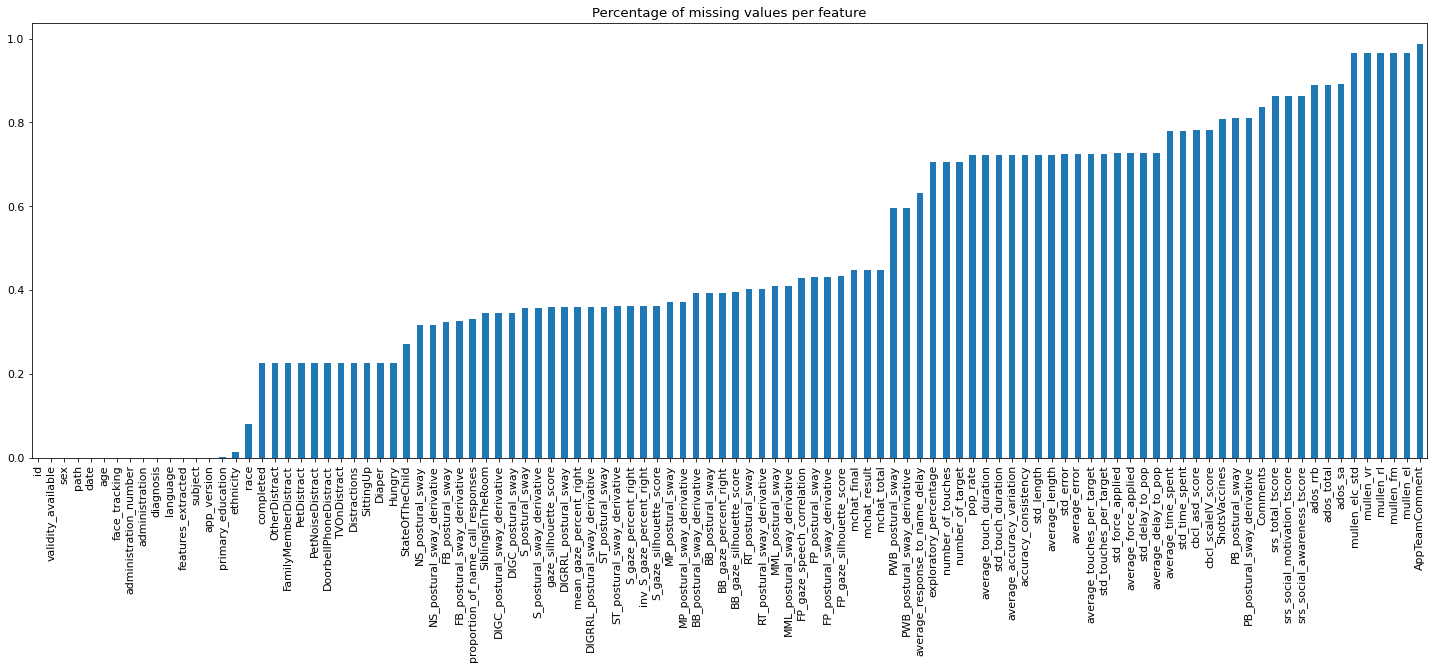

In [224]:
import missingno as msno
df_X = df[data.features_name]
# Computes feature correlation
df_corr = df_X.corr(method="pearson")
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

plt.figure()
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(25, 8),
    title="Percentage of missing values per feature")

<AxesSubplot:title={'center':'Percentage of missing values per feature'}>

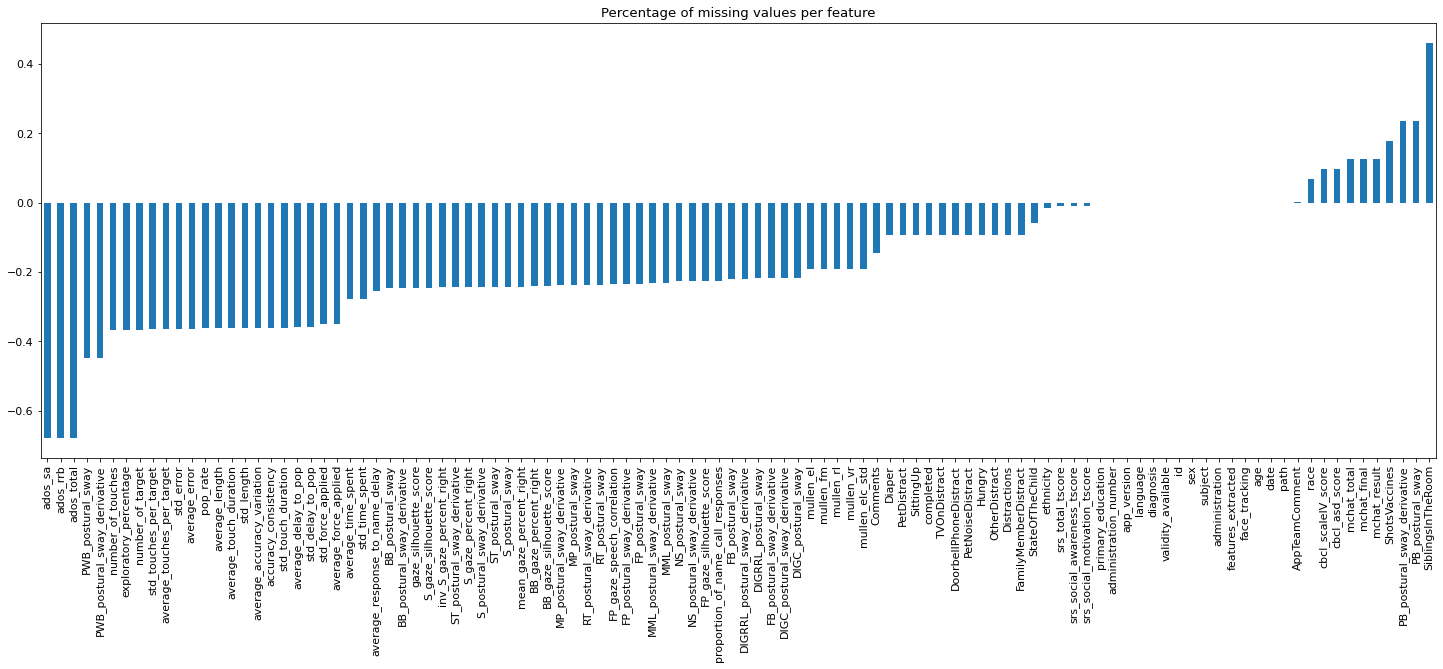

In [227]:
(df[df['diagnosis']==1].isna().mean() - df[df['diagnosis']==0].isna().mean()).sort_values().plot(
    kind="bar", figsize=(25, 8),
    title="Percentage of missing values per feature")

In [231]:
df_X_asd = df[df['diagnosis']==1][data.features_name]
df_X_td = df[df['diagnosis']==0][data.features_name]

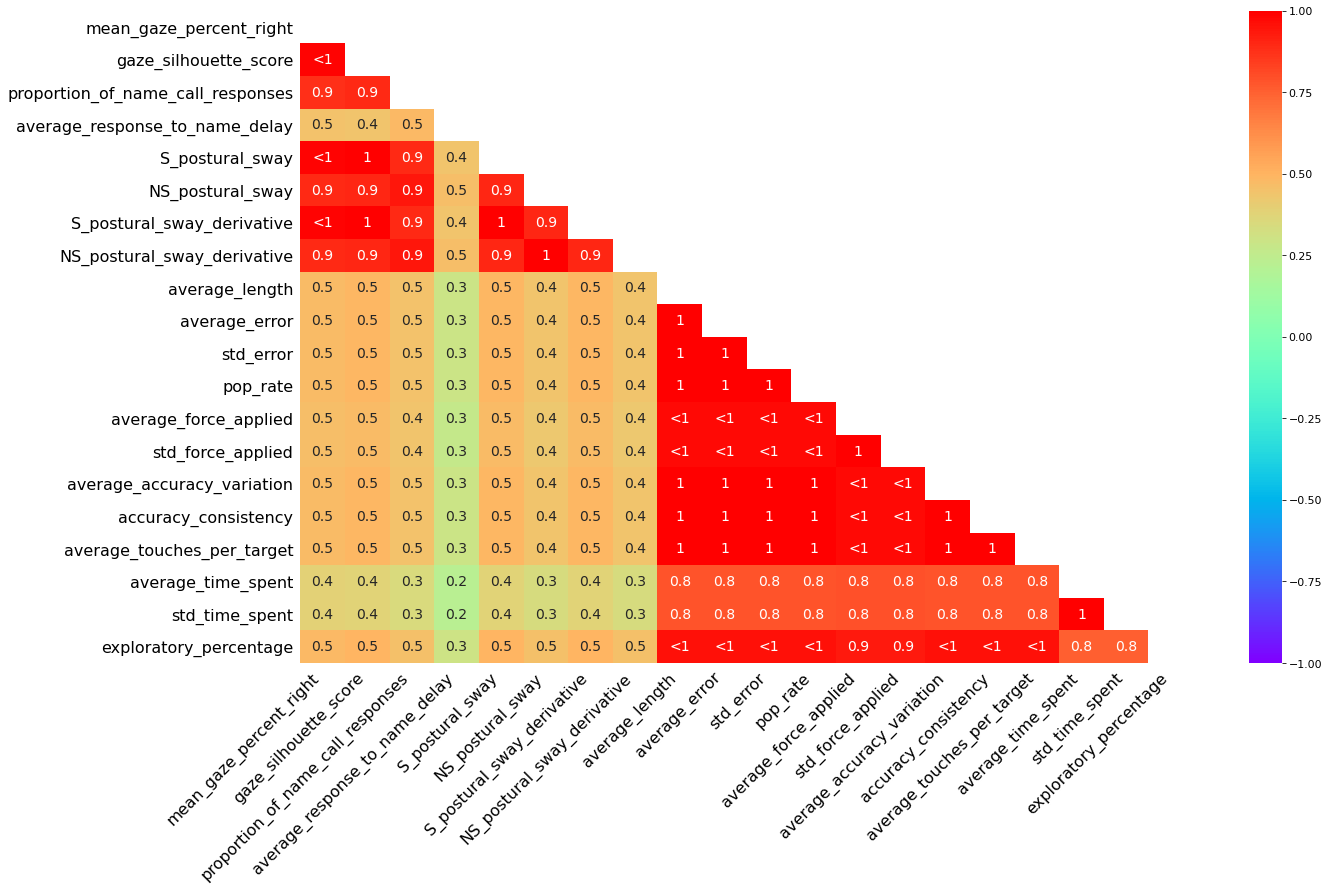

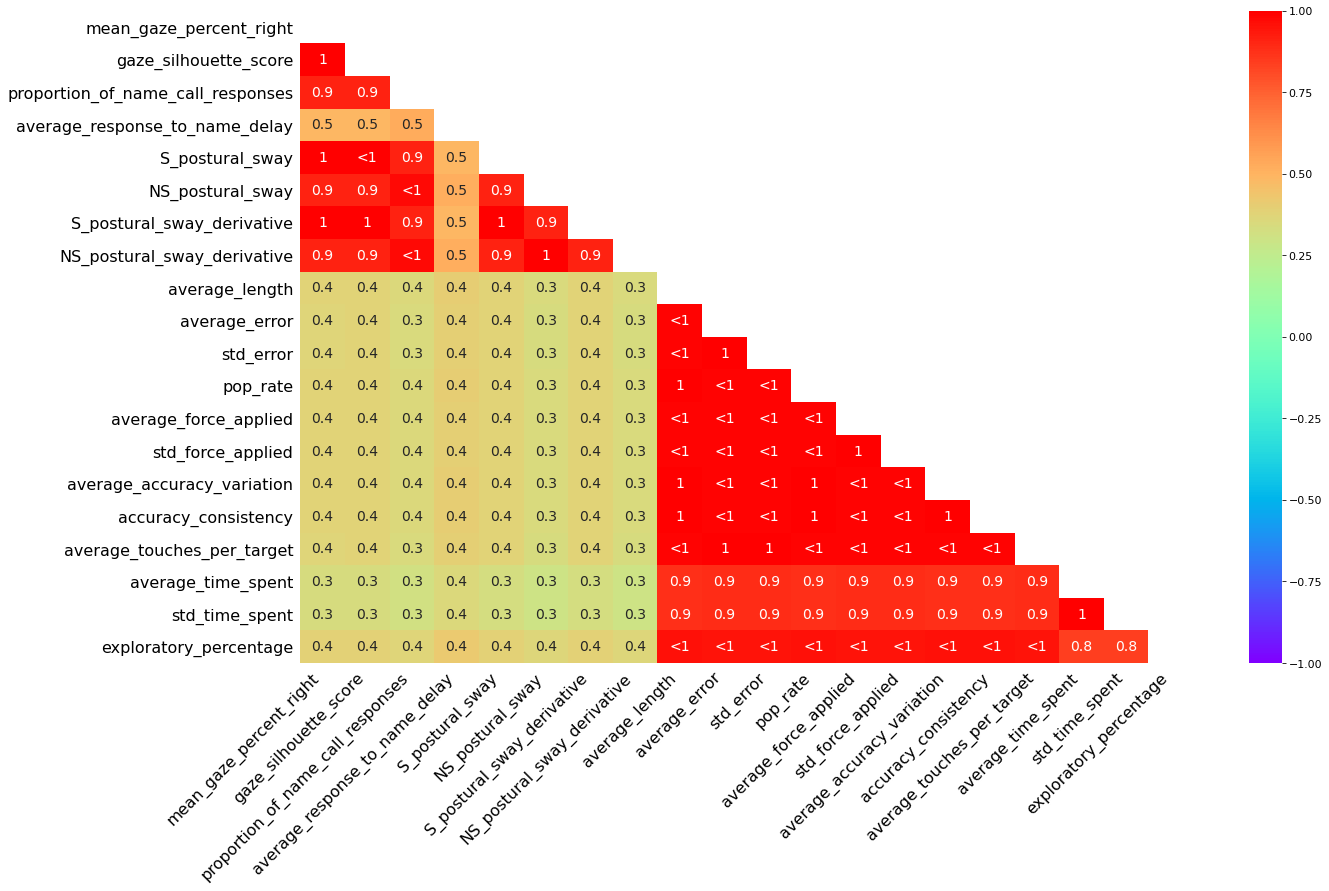

In [204]:
msno.heatmap(df_X_asd, cmap='rainbow');
msno.heatmap(df_X_td, cmap='rainbow');

In [211]:
#msno.dendrogram(df_X)

age                                                                                sex                                              
           count       mean        std        min        25%        50%        75%       max  count      mean       std  min  25%  50%   75%  max
diagnosis                                                                                                                                        
0.0        134.0  27.342550   6.831953  24.000000  24.131148  24.622951  27.049180  56.95082  134.0  0.417910  0.495066  0.0  0.0  0.0  1.00  1.0
1.0        114.0  31.272936  12.201958  16.295082  23.295082  26.868852  36.131148  58.95082  114.0  0.254386  0.437438  0.0  0.0  0.0  0.75  1.0

In [223]:
for scenario, label in zip(['asd_td_age_matched_n_balanced','asd_td_age_matched_n_unbalanced'],['Balanced', 'Unbalanced'] ):
    data._init_scenario(scenario)
    print("\n\nScenario: {} Class imbalance: {:.2f} (#pos/#neg; {:.2f} times more TD)".format(label, data.imbalance_ratio, 1/data.imbalance_ratio))
    display(data.df.groupby(data.outcome_column)[['id']].count())
    display(data.df.groupby('diagnosis')[['age', 'sex']].describe())
    
    
    
Trying to predict the behaviors of the child instead of the diagnosis, like for instance  goruping social and non social based on percetn right for instance 

trying to have behavioral laabels from the data! 

doing mutliple loss with trying to predict both mchat and social behav or diagnoissi 

add lower dimension cluster! 


SRS social awarness is there colors with regions

do a plot for all the data set with a testing perfomances that 

1) synthecticall saple at 3 percentage for the asd 

2) correct the measure at posteriori with the prior of the classes 
corrected_f1 

corrected f1 
    




Scenario: Balanced Class imbalance: 0.85 (#pos/#neg; 1.18 times more TD)


id
diagnosis     
0.0        134
1.0        114

age                                                                                sex                                              
           count       mean        std        min        25%        50%        75%       max  count      mean       std  min  25%  50%   75%  max
diagnosis                                                                                                                                        
0.0        134.0  27.342550   6.831953  24.000000  24.131148  24.622951  27.049180  56.95082  134.0  0.417910  0.495066  0.0  0.0  0.0  1.00  1.0
1.0        114.0  31.272936  12.201958  16.295082  23.295082  26.868852  36.131148  58.95082  114.0  0.254386  0.437438  0.0  0.0  0.0  0.75  1.0



Scenario: Unbalanced Class imbalance: 0.31 (#pos/#neg; 3.25 times more TD)


id
diagnosis     
0.0        234
1.0         72

age                                                                                sex                                             
           count       mean       std        min        25%        50%        75%        max  count      mean       std  min  25%  50%  75%  max
diagnosis                                                                                                                                       
0.0        234.0  22.856662  2.829572  18.655738  19.614754  23.967213  24.393443  29.901639  234.0  0.440171  0.497472  0.0  0.0  0.0  1.0  1.0
1.0         72.0  23.549180  3.734348  16.295082  20.336066  24.311475  26.303279  29.836066   72.0  0.277778  0.451046  0.0  0.0  0.0  1.0  1.0

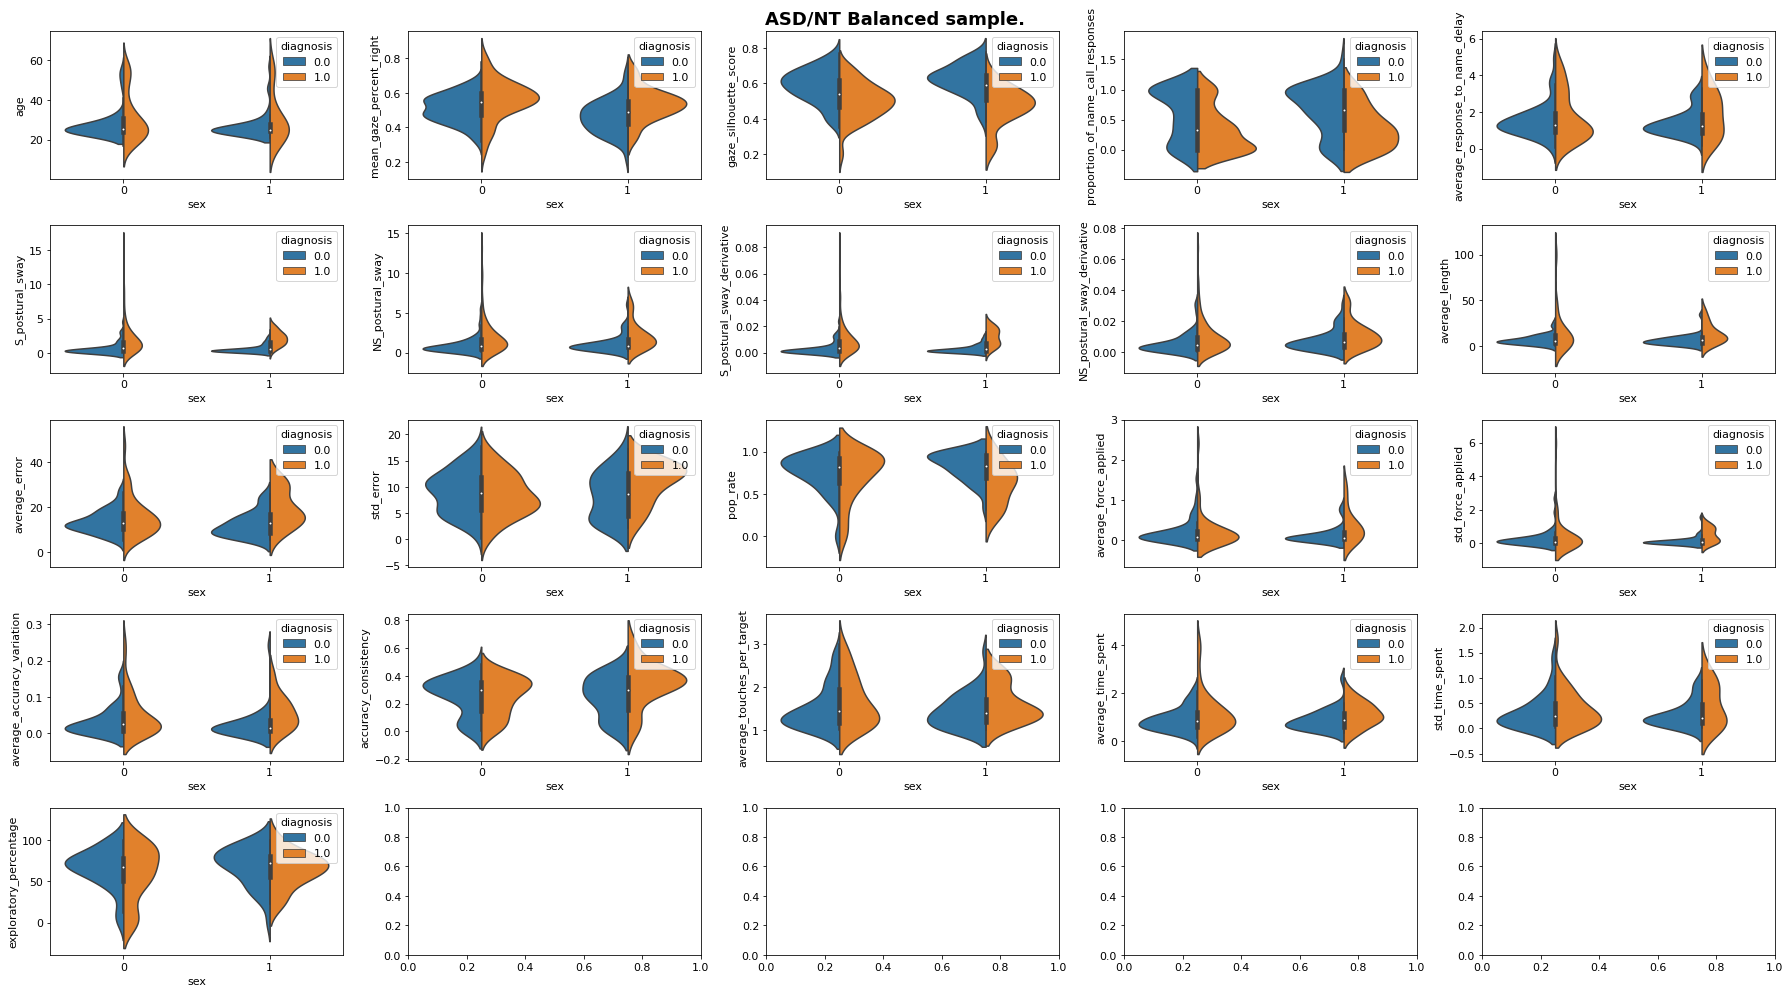

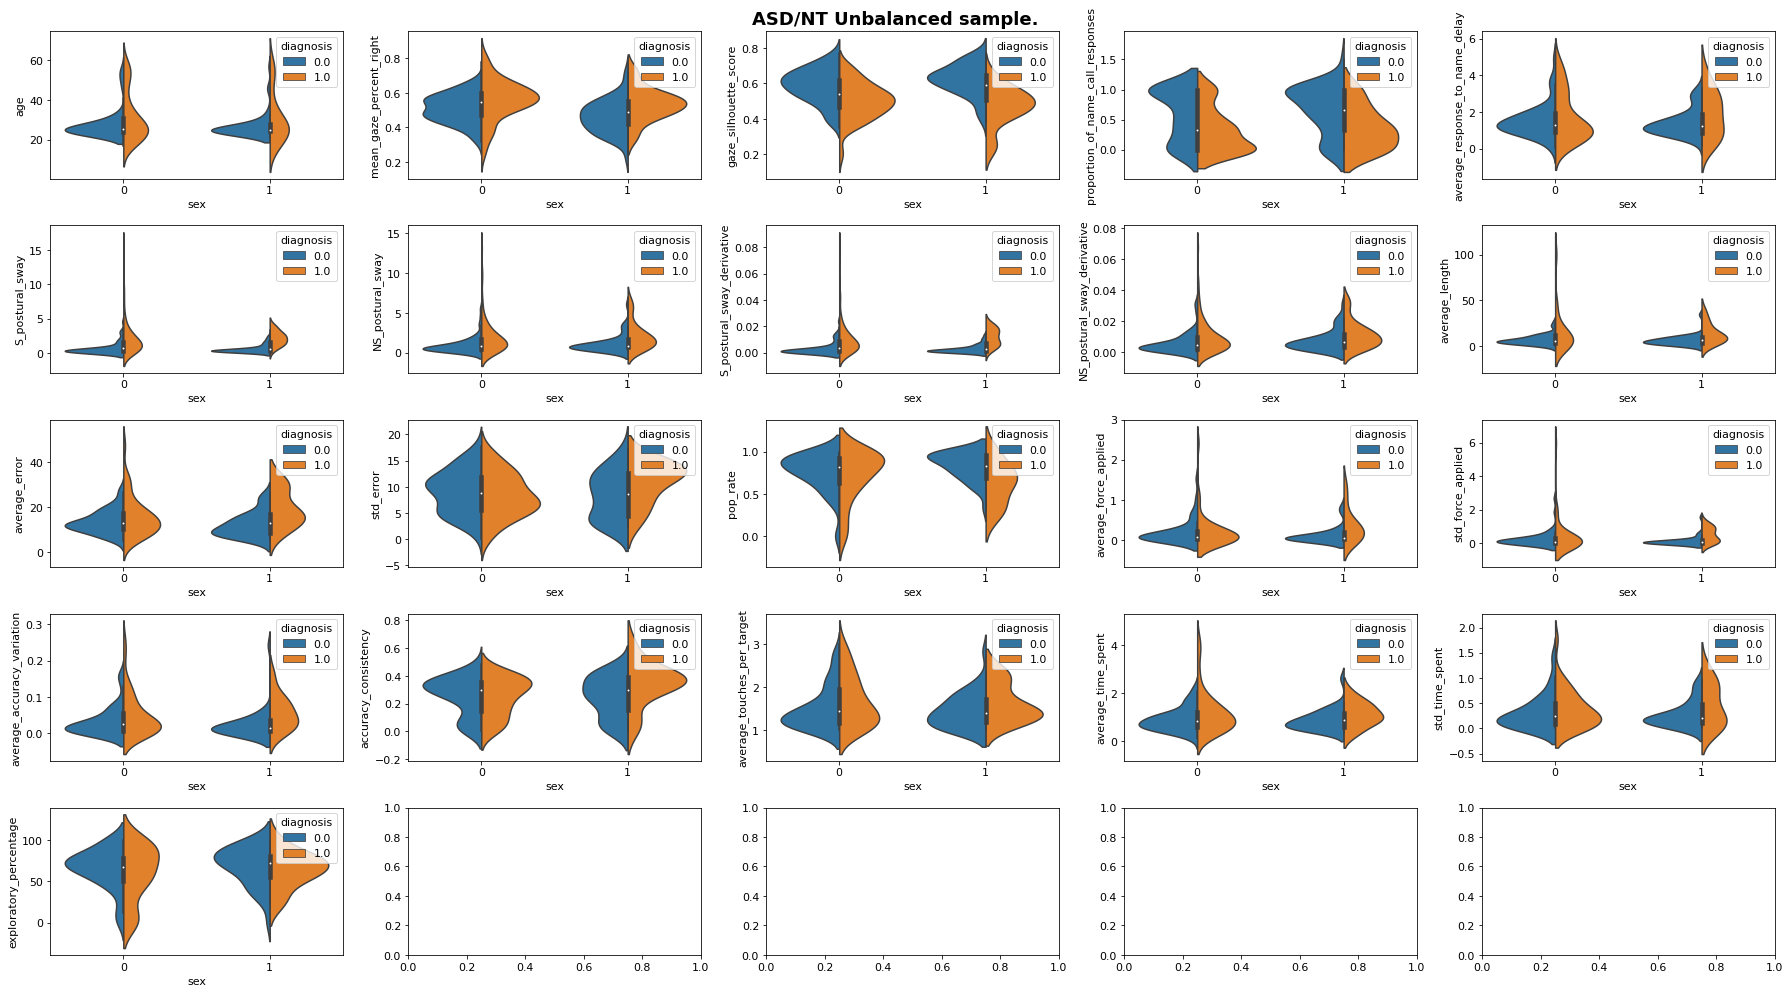

In [148]:
set_of_features  = {'asd_td_age_matched_n_balanced':["S_postural_sway", "mean_gaze_percent_right", "proportion_of_name_call_responses", "gaze_silhouette_score", "NS_postural_sway_derivative", "average_length"],
                    'asd_td_age_matched_n_unbalanced': ["S_postural_sway", "mean_gaze_percent_right", "NS_postural_sway", "proportion_of_name_call_responses", "NS_postural_sway_derivative", "gaze_silhouette_score"]}

selected_features = ['age'] + data.features_name

for scenario, label in zip(['asd_td_age_matched_n_balanced','asd_td_age_matched_n_balanced'],['Balanced', 'Unbalanced'] ):
    data._init_scenario(scenario)
    

    # Create a figure with 3 x 2 subplots
    fig, axes = plt.subplots(ncols=5, nrows=len(selected_features)//5 +1, figsize=(25, 14))
    fig.suptitle("ASD/NT {} sample.".format(label), weight='bold', fontsize=18)
    # Loop through these features and plot entries from each feature against `Latitude`
    for col, ax in zip(selected_features, axes.ravel()):
        sns.violinplot(data=data.df, y=col, x='sex', hue='diagnosis', palette="tab10",
                       split=True, ax=ax)
    plt.tight_layout()
    
    exp = Experiments(data.dataset_name,
                      dataset=data, 
                      approach=approach, 
                      previous_experiment=None,        
                      debug=True, 
                      verbosity=0, 
                      save_experiment=True)
    exp.fit_predict(num_cv=num_cv)

In [158]:
for scenario, label in zip(['asd_td_age_matched_n_balanced','asd_td_age_matched_n_balanced'],['Balanced', 'Unbalanced'] ):
    data._init_scenario(scenario)
exp = Experiments(data.dataset_name,
                      dataset=data, 
                      approach='ebm', 
                      previous_experiment=None,        
                      debug=True, 
                      verbosity=0, 
                      save_experiment=False)
exp.fit_predict(num_cv=16)
exp.plot()

Accuracy  F1 score (2 PPVxTPR/(PPV+TPR))  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)
0     0.798                           0.788                                   0.597                                              0.816                                                       0.784                                            0.762                            0.833                                   0.184                             0.238                            0.167

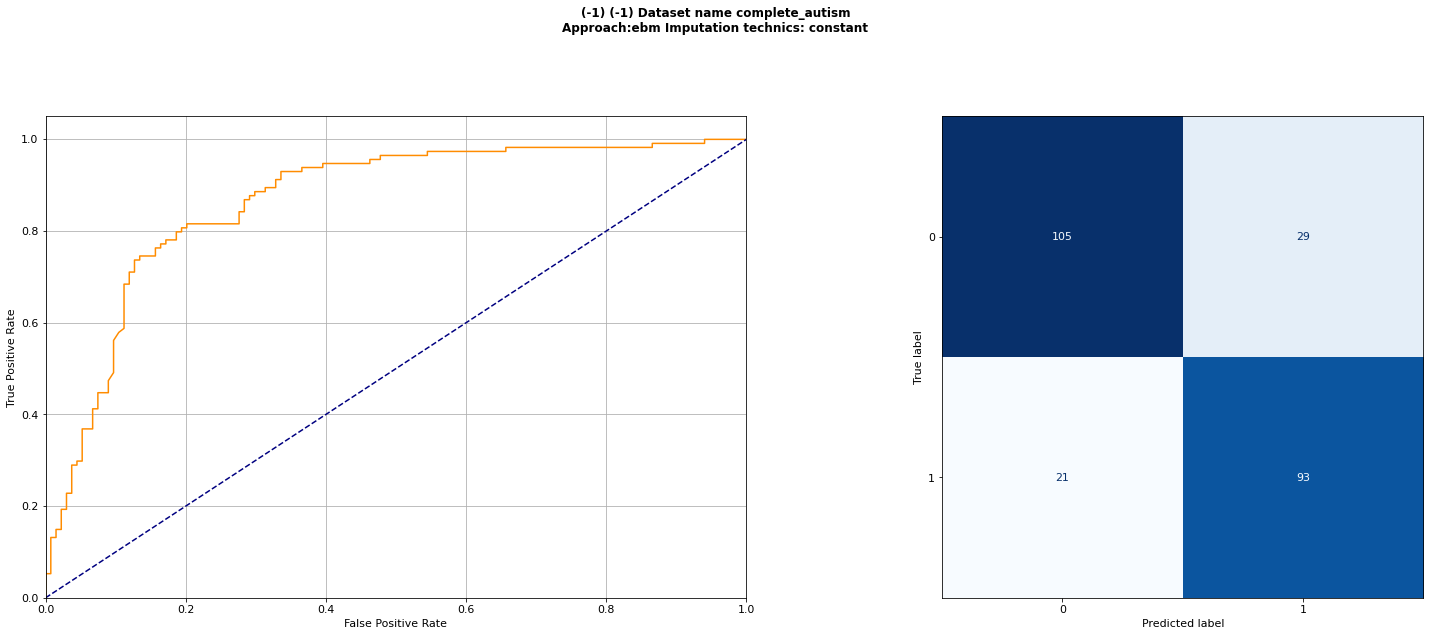

<!-- http://127.0.0.1:7001/140317048563600/ -->

In [159]:
exp.plot()

In [162]:
from interpret import show

ebm_local = exp.model.explain_local(exp.dataset.X_train[:10,:], exp.dataset.y_train[:10])
show(ebm_local)

<!-- http://127.0.0.1:7001/140318329785424/ -->

#### Other 

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df[['diagnosis', 'language', 'app_version', 'features_extracted', 'face_tracking', 'age',
    'sex', 'ethnicity', 'race', 'primary_education',
    'mullen_el', 'mullen_fm', 'mullen_rl', 'mullen_vr',
       'mullen_elc_std', 'ados_total', 'ados_rrb', 'ados_sa',
       'srs_total_tscore', 'srs_social_awareness_tscore',
       'srs_social_motivation_tscore', 'cbcl_scaleIV_score',
       'cbcl_asd_score', 'mchat_total', 'mchat_final', 'mchat_result',
       'BB_gaze_percent_right', 'BB_gaze_silhouette_score',
       'S_gaze_percent_right', 'S_gaze_silhouette_score',
       'FP_gaze_speech_correlation', 'FP_gaze_silhouette_score',
       'proportion_of_name_call_responses',
       'average_response_to_name_delay', 'FB_postural_sway',
       'FB_postural_sway_derivative', 'DIGC_postural_sway',
       'DIGC_postural_sway_derivative', 'DIGRRL_postural_sway',
       'DIGRRL_postural_sway_derivative', 'ST_postural_sway',
       'ST_postural_sway_derivative', 'MP_postural_sway',
       'MP_postural_sway_derivative', 'PB_postural_sway',
       'PB_postural_sway_derivative', 'BB_postural_sway',
       'BB_postural_sway_derivative', 'RT_postural_sway',
       'RT_postural_sway_derivative', 'MML_postural_sway',
       'MML_postural_sway_derivative', 'PWB_postural_sway',
       'PWB_postural_sway_derivative', 'FP_postural_sway',
       'FP_postural_sway_derivative', 'number_of_touches',
       'average_length', 'std_length', 'average_error', 'std_error',
       'number_of_target', 'pop_rate', 'average_touch_duration',
       'std_touch_duration', 'average_delay_to_pop', 'std_delay_to_pop',
       'average_force_applied', 'std_force_applied',
       'average_accuracy_variation', 'accuracy_consistency',
       'average_touches_per_target', 'std_touches_per_target',
       'average_time_spent', 'std_time_spent', 'exploratory_percentage',
       'completed', 'StateOfTheChild', 'SiblingsInTheRoom',
       'ShotsVaccines', 'Distractions', 'FamilyMemberDistract',
       'PetDistract', 'PetNoiseDistract', 'DoorbellPhoneDistract',
       'TVOnDistract', 'OtherDistract', 'SittingUp', 'Hungry', 'Diaper',
      'validity_available',
       'administration_number', 'S_postural_sway', 'NS_postural_sway',
       'gaze_silhouette_score', 'inv_S_gaze_percent_right',
       'mean_gaze_percent_right']], title="Pandas Profiling Report")


profile.to_file("./autism_report_df.html")


In [20]:
def select(data,feature,value,unique=False):
    """Example : select(data,'ASD+',1,unique=True)
                 select(data,'sex','Male')
    """
    if unique:
        data_unique=data.drop_duplicates(subset = "id",keep='first')
        selected_data = data_unique[data_unique[feature]==value]
    else:
        selected_data = data[data[feature]==value]
    return(selected_data)

Predicting diagnosis based on 40 features

**********************************
 statistics:

**********************************
1220 subjects 
697  male
523  female
0  unknown sex beacause of missing clinical data 


**********************************
192 subjects in the ASD group
136 number of male
56 number of female 
 

**********************************
950 subjects in the TD group
502 number of male
448 number of female 


**********************************
29 subjects in the DL/DD group
21 number of male
8 number of female 


**********************************
49 subjects in the ADHD group
38 number of male
38 number of female 



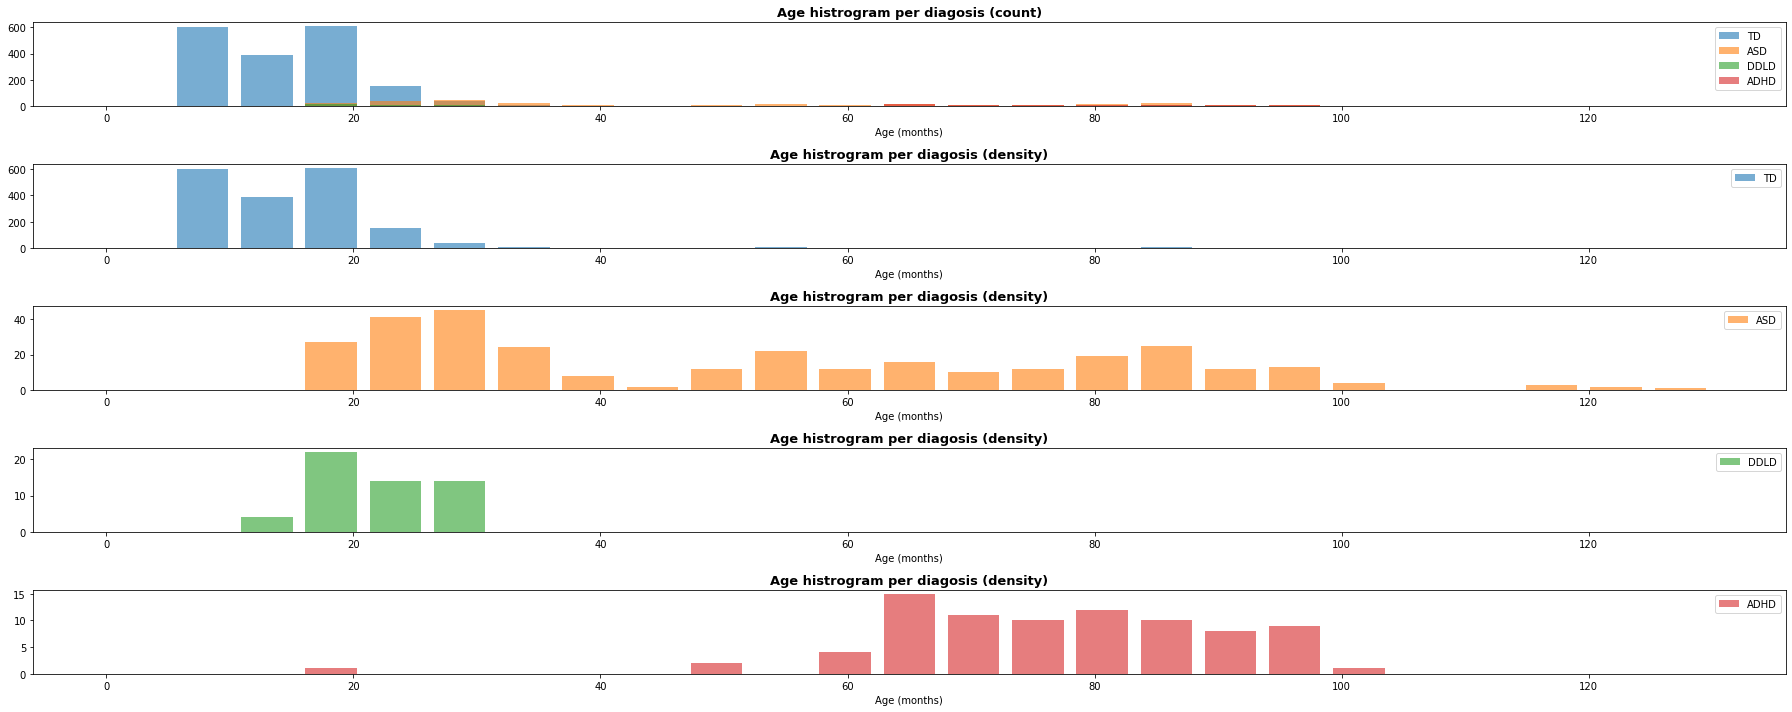

In [54]:
df = pd.read_csv("/home01/sam/df_all.csv")

data = Dataset(df=df, 
               missing_data_handling='encoding', 
               imputation_method='without', 
               proportion_train=1)

DIAG_DICT = {'TD':0., 
            'ASD':1., 
            'DDLD':2., 
            'ADHD':3.}
DIAG_DICT_REVERSE = {v: k for k, v in DIAG_DICT.items()}

colors = {'TD':'#1f77b4',
          'ASD': '#ff7f0e',
          'DDLD':'#2ca02c',
          'ADHD':'#d62728',
          'comorbid':'#9467bd'}
           
    
fig, axes = plt.subplots(5, 1, figsize=(25, 10)); axes=axes.flatten()

for i, d in df.groupby('diagnosis'):
    axes[0].hist(d['age'], bins=np.linspace(0, 130, 26), density=False, alpha=.6, rwidth=.8, color=colors[DIAG_DICT_REVERSE[i]], label=DIAG_DICT_REVERSE[i])
axes[0].legend(); axes[0].set_title("Age histrogram per diagosis (count)", weight='bold', fontsize=13); axes[0].set_xlabel("Age (months)")

for i, d in df.groupby('diagnosis'):
    axes[int(i+1)].hist(d['age'], bins=np.linspace(0, 130, 26), density=False, alpha=.6, rwidth=.8, color=colors[DIAG_DICT_REVERSE[i]], label=DIAG_DICT_REVERSE[i])
    axes[int(i+1)].legend(); axes[int(i+1)].set_title("Age histrogram per diagosis (density)", weight='bold', fontsize=13);axes[int(i+1)].set_xlabel("Age (months)")
plt.tight_layout()


"""
    Print population statistics at the beginning of the notebook.
"""
print('\n**********************************')
print(' statistics:')
print('\n**********************************')
data = df
# Masks
data_unique=data.drop_duplicates(subset = "id",keep='first')
data_unique_asd = select(data,'diagnosis',1,True)
data_unique_nasd = select(data,'diagnosis',0,True)
data_male = select(data,'sex',0)
data_female = select(data,'sex',1)
data_asd = select(data,'diagnosis',1)
data_nasd = select(data,'diagnosis',0)


#Count the number of subjects
subjects_id = np.unique(data['id'])
number_of_subjects = len(subjects_id)

subject_male = np.sum(data_unique['sex']==0)
subject_female = np.sum(data_unique['sex']==1)
subject_unknown = np.sum(pd.isna(data_unique['sex']))

print('{} subjects '.format(number_of_subjects))
print('{}  male'.format(subject_male))
print('{}  female'.format(subject_female)) 
print('{}  unknown sex beacause of missing clinical data \n'.format(subject_unknown)) 

# mchat_total_1_positive=data_unique.loc[data_unique['clinical_mchat_total_score']>=3]
# mchat_final_1_positive = mchat_total_1_positive.loc[mchat_total_1_positive['clinical_final_mchat_score']>=2]    
# mchat_total_2_positive=data_unique.loc[data_unique['clinical_mchat_total_score2']>=3]
# mchat_final_2_positive = mchat_total_1_positive.loc[mchat_total_1_positive['clinical_final_mchat_score2']>=2]    

# print('\n**********************************')
# print('{} subjects are "mchat positive" (First Adminisstration) '.format(len(mchat_final_1_positive)))
# print('{} subjects are "mchat positive" (Second Adminisstration) '.format(len(mchat_final_2_positive)))


nasd_subjects_id = data_unique_nasd[['id','sex']]
nasd_subject_male = np.sum(data_unique_nasd['sex']==0)
nasd_subject_female = np.sum(data_unique_nasd['sex']==1)

asd_subjects_id = data_unique_asd[['id','sex']]
asd_subject_male = np.sum(data_unique_asd['sex']==0)
asd_subject_female = np.sum(data_unique_asd['sex']==1)

dd_subjects_id = select(data_unique,'diagnosis', 2)[['id','sex']]
dd_subject_male = np.sum(dd_subjects_id['sex']==0)
dd_subject_female = np.sum(dd_subjects_id['sex']==1)

adhd_subjects_id = select(data_unique,'diagnosis', 3)[['id','sex']]
adhd_subject_male = np.sum(adhd_subjects_id['sex']==0)
adhd_subject_female = np.sum(adhd_subjects_id['sex']==1)

print('\n**********************************')
print('{} subjects in the ASD group'.format(len(asd_subjects_id)))
print('{} number of male'.format(asd_subject_male))
print('{} number of female \n '.format(asd_subject_female)) 


print('\n**********************************')
print('{} subjects in the TD group'.format(len(nasd_subjects_id)))
print('{} number of male'.format(nasd_subject_male))
print('{} number of female \n'.format(nasd_subject_female)) 



print('\n**********************************')
print('{} subjects in the DL/DD group'.format(len(dd_subjects_id)))
print('{} number of male'.format(dd_subject_male))
print('{} number of female \n'.format(dd_subject_female)) 

print('\n**********************************')
print('{} subjects in the ADHD group'.format(len(adhd_subjects_id)))
print('{} number of male'.format(adhd_subject_male))
print('{} number of female \n'.format(adhd_subject_male)) 

In [81]:
import missingno as msno

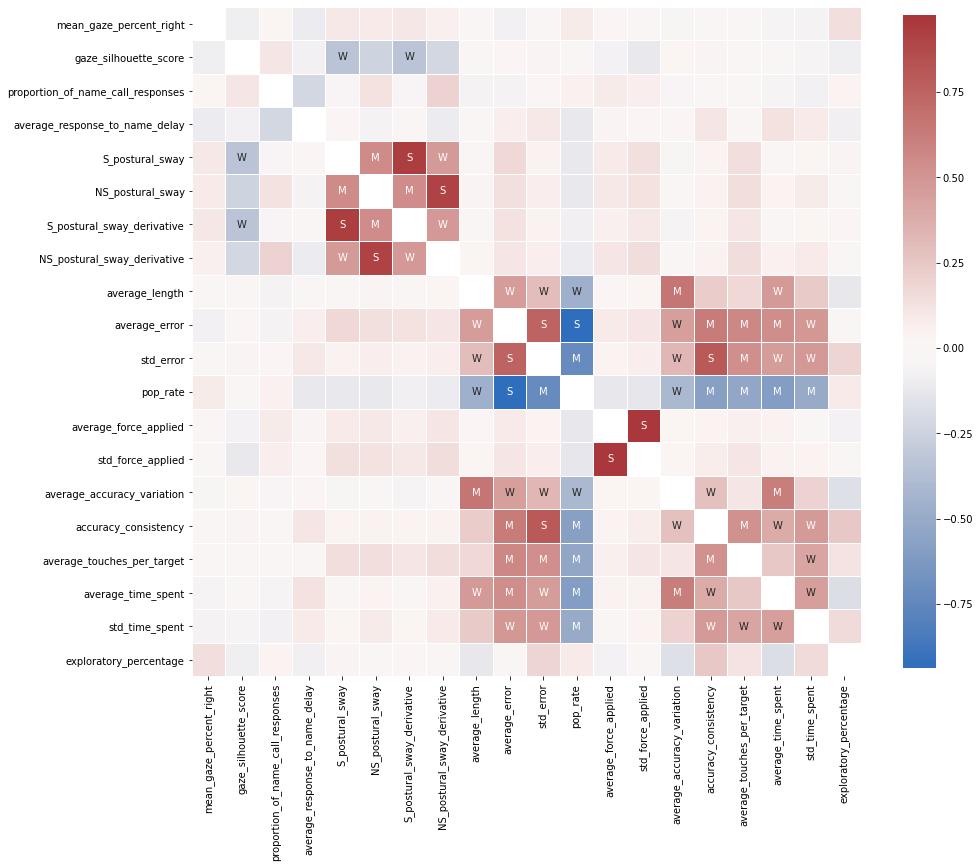

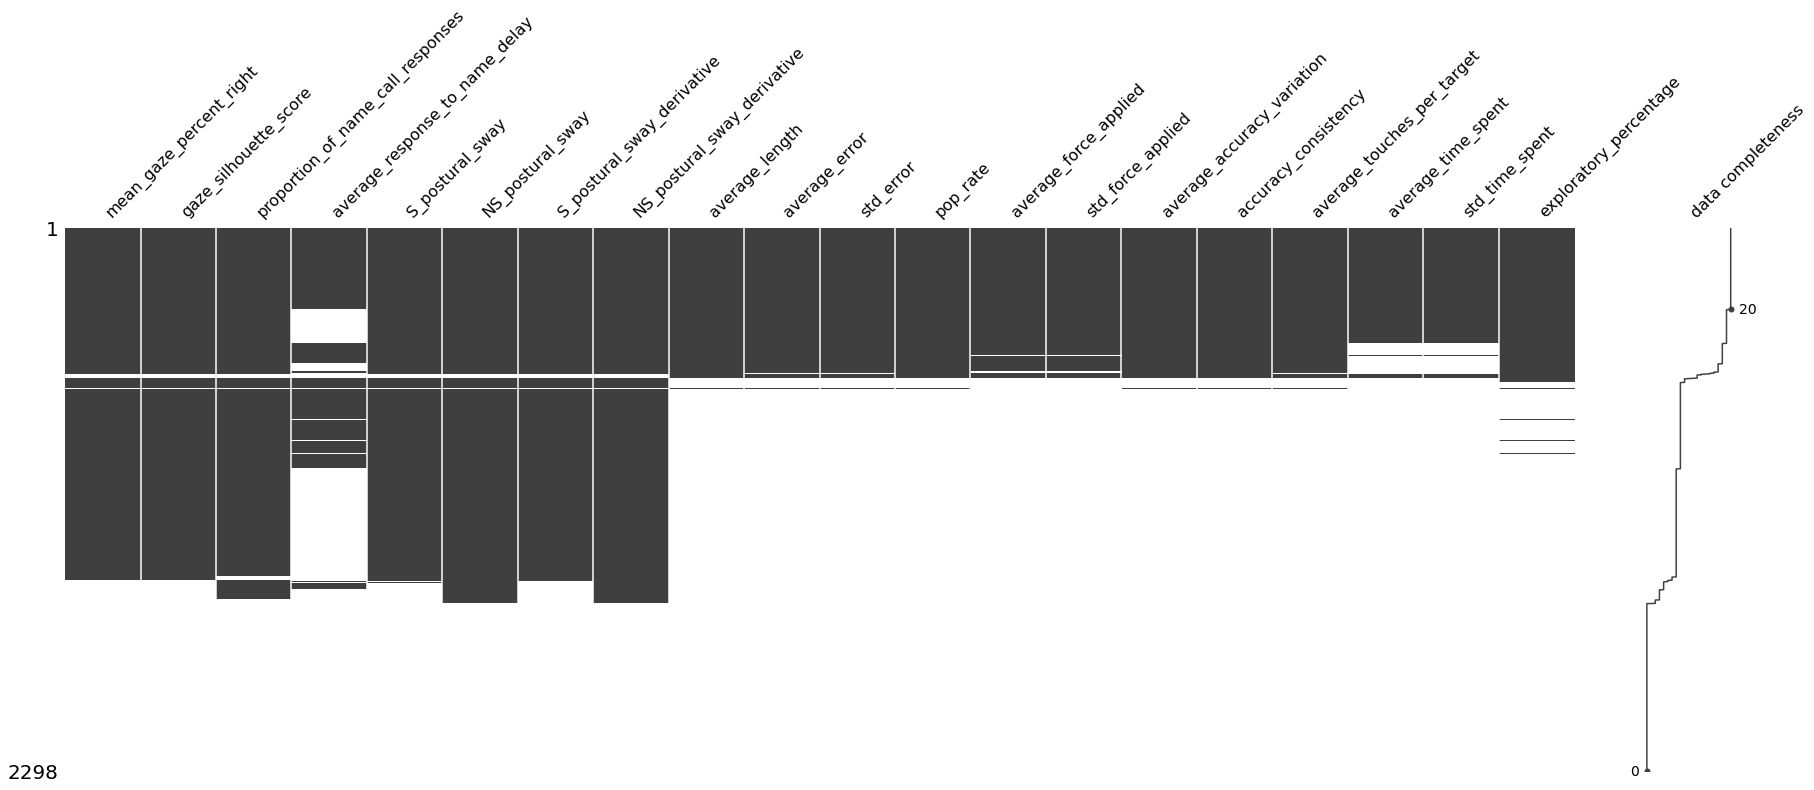

In [89]:
df_X = df[data.features_name[:int(len(data.features_name)//2)]]
# Computes feature correlation
df_corr = df_X.corr(method="pearson")

labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});


msno.matrix(df_X, labels=True, sort="descending", figsize=(30, 10));

In [102]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

pop_rate                     average_error           -0.936662
                             std_error               -0.723631
average_time_spent           pop_rate                -0.593849
accuracy_consistency         pop_rate                -0.582379
average_touches_per_target   pop_rate                -0.532550
                                                        ...   
std_error                    average_error            0.756120
accuracy_consistency         std_error                0.801857
NS_postural_sway_derivative  NS_postural_sway         0.912165
S_postural_sway_derivative   S_postural_sway          0.935392
std_force_applied            average_force_applied    0.973714
Length: 190, dtype: float64

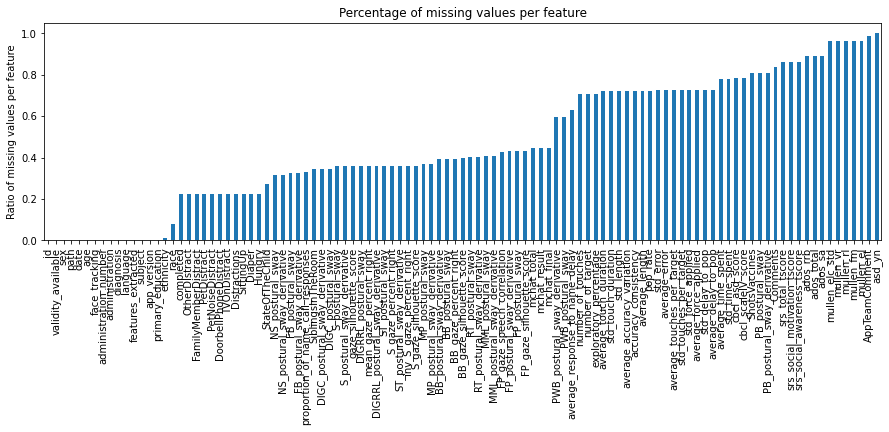

In [85]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

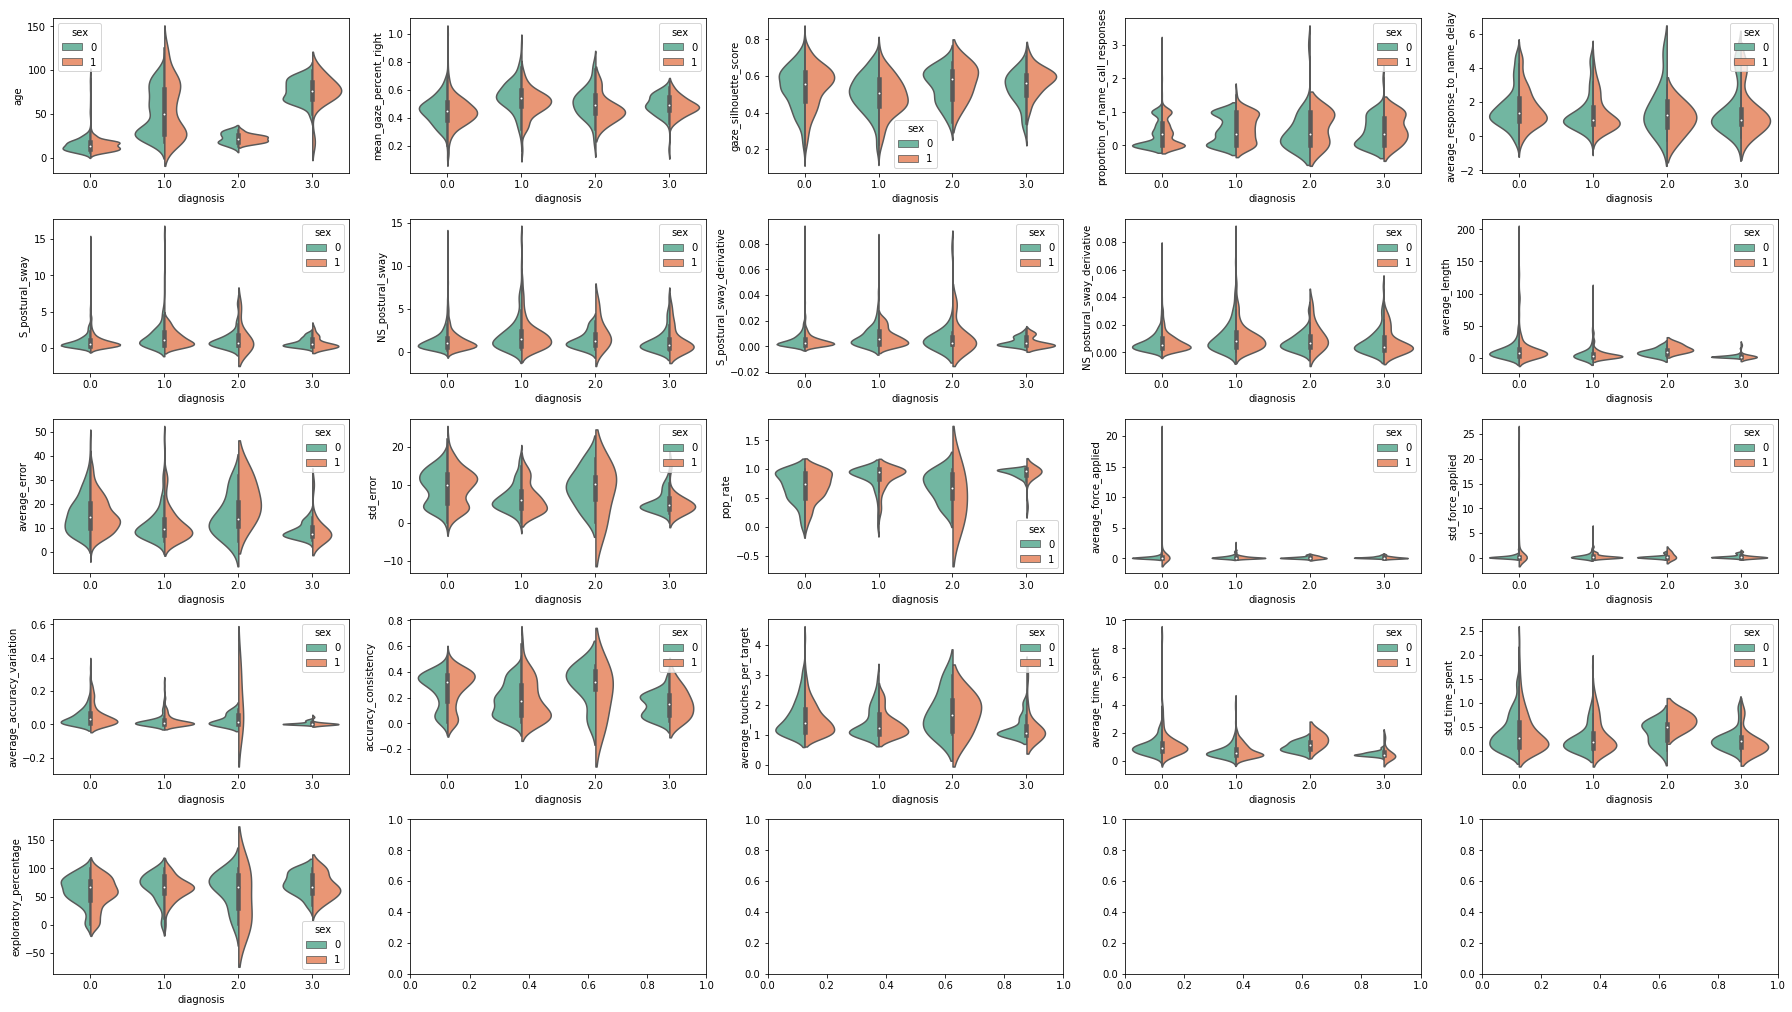

In [129]:
selected_features = ['age'] + data.features_name[:int(len(data.features_name)//2)]

# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=5, nrows=len(selected_features)//5 +1, figsize=(25, 14))
# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df, y=col, x='diagnosis', hue='sex', palette="Set2",
                   split=True, ax=ax)
plt.tight_layout()

# Create experiments dataframe

In [3]:
df =  pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")

#df =  pd.read_csv("/home01/sam/df_all.csv")
df['study'] = df['path'].apply(lambda x: x.split('/')[-3] if x.split('/')[-3] in S2K_STUDIES else x.split('/')[-4])
df[(df['feature_extraction']==0)]

KeyError: 'feature_extraction'

In [236]:
if False:
    from utils import create_autism_df
    df = create_autism_df(folder_names = ['autism_all'])
else:
    df = pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/autism_data_analysis.csv")
df

df.loc[(df['missing_data_handling']=='encoding'), 'imputation_method'] = 'constant'


dataset_name  experiment_number            approach missing_data_handling imputation_method                                      features_name  n_features  use_missing_indicator_variables  scale_data sampling_method                         scenario  num_samples  imbalance_ratio  ratio_of_missing_values  ratio_missing_per_class_0  ratio_missing_per_class_1  resolution  bandwidth  estimation_time  num_cv     auc  Accuracy      F1     MCC  Sensitivity  Specificity  Precision     PPV     NPV     FNR     FDR     FOR
0     complete_autism                428             xgboost              encoding           without  ['S_postural_sway', 'mean_gaze_percent_right',...           6                            False        True           smote  asd_td_age_matched_n_unbalanced          297         0.320000                 0.088103                   0.059259                   0.178241          20        0.2         2.761678       8     NaN    0.8010  0.5280  0.4130       0.4580       0.9110     0.6230  0.6230  0.8400  0.5420  0.3770  0.1600
1     complete_autism               3643             xgboost            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           4                             True       False           smote    asd_td_age_matched_n_balanced          237         0.926829                 0.058544                   0.030488                   0.088816          20        0.2         2.589072       8     NaN    0.7760  0.7820  0.5590       0.8330       0.7240     0.7360  0.7360  0.8240  0.1670  0.2640  0.1760
2     complete_autism               4745                 ebm            imputation              mean     ['S_postural_sway', 'mean_gaze_percent_right']           2                            False       False         vanilla    asd_td_age_matched_n_balanced          237         0.926829                 0.118143                   0.060976                   0.179825          20        0.2        11.406883       8     NaN    0.7430  0.7450  0.4880       0.7810       0.7070     0.7120  0.7120  0.7770  0.2190  0.2880  0.2230
3     complete_autism               4306  LogisticRegression            imputation               knn  ['S_postural_sway', 'mean_gaze_percent_right',...           3                            False       False           smote  asd_td_age_matched_n_unbalanced          297         0.320000                 0.088664                   0.059259                   0.180556          20        0.2         0.036443       8     NaN    0.7950  0.4300  0.3540       0.3190       0.9470     0.6570  0.6570  0.8130  0.6810  0.3430  0.1870
4     complete_autism               4655                 ebm            imputation              mean  ['S_postural_sway', 'mean_gaze_percent_right',...           4                             True       False         vanilla    asd_td_age_matched_n_balanced          237         0.926829                 0.058544                   0.030488                   0.088816          20        0.2        51.596157      16     NaN    0.7760  0.7730  0.5530       0.7890       0.7640     0.7560  0.7560  0.7970  0.2110  0.2440  0.2030
...               ...                ...                 ...                   ...               ...                                                ...         ...                              ...         ...             ...                              ...          ...              ...                      ...                        ...                        ...         ...        ...              ...     ...     ...       ...     ...     ...          ...          ...        ...     ...     ...     ...     ...     ...
4955  complete_autism                140                 ebm              encoding           without  ['S_postural_sway', 'mean_gaze_percent_right',...           3                             True        True         without  asd_td_age_matched_n_unbalanced          297         0.320000                 0.044332               

In [238]:
df[df.duplicated(subset=['approach', 'missing_data_handling', 'imputation_method', 'n_features', 'use_missing_indicator_variables', 'scale_data', 'sampling_method', 'scenario', 'num_cv'])]

Empty DataFrame
Columns: [dataset_name, experiment_number, approach, missing_data_handling, imputation_method, features_name, n_features, use_missing_indicator_variables, scale_data, sampling_method, scenario, num_samples, imbalance_ratio, ratio_of_missing_values, ratio_missing_per_class_0, ratio_missing_per_class_1, resolution, bandwidth, estimation_time, num_cv, auc, Accuracy, F1, MCC, Sensitivity, Specificity, Precision, PPV, NPV, FNR, FDR, FOR]
Index: []

## Introduction - Dataset definition

In [6]:
#df = pd.read_csv("/home01/sam/df_all.csv")
df = pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")
set_of_features  = {'asd_td_age_matched_n_balanced':["S_postural_sway", "mean_gaze_percent_right", "proportion_of_name_call_responses", "gaze_silhouette_score", "NS_postural_sway_derivative", "average_length"],
                    'asd_td_age_matched_n_unbalanced': ["S_postural_sway", "mean_gaze_percent_right", "NS_postural_sway", "proportion_of_name_call_responses", "NS_postural_sway_derivative", "gaze_silhouette_score"]}

scenario = 'asd_td_age_matched_n_balanced'

data = Dataset(df=df, 
               missing_data_handling='encoding', 
               imputation_method='without', 
               sampling_method='vanilla',
               features_name=set_of_features[scenario],
               scenario=scenario,
               proportion_train=1)

Removing 149/2298 incomplete administrations.
Removing 953/2149 keeping first admin.
Removing 77/1196 keeping only subject with diagnosis: [0, 1].
Removing 389/1119 keeping only subject with age between 10 and 60 mo.
Removing 482/730 to match age. (removed diagnosis group : 0).
248 administrations left.


id
diagnosis     
0.0        134
1.0        114

Splitting dataset into test and train set.
Encoding 248 (train) and 0 (test) missing values with -5.
Upampling minority class. Imbalance ratio of: 0.85 to 1.00
Predicting diagnosis based on 12 features


## `multi_ditributions` approach

## `single_distribution` approach

## `Neural Additive Networks` approach

Encoding 248 (train) and 0 (test) missing values with -5.


Accuracy  F1 score (2 PPVxTPR/(PPV+TPR))  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  Area Under the Curve (AUC)
0    0.7904                          0.7522                                  0.5804                                              0.691                                                      0.8756                                           0.8252                           0.7693                                   0.309                            0.1748                           0.2307                      0.8593

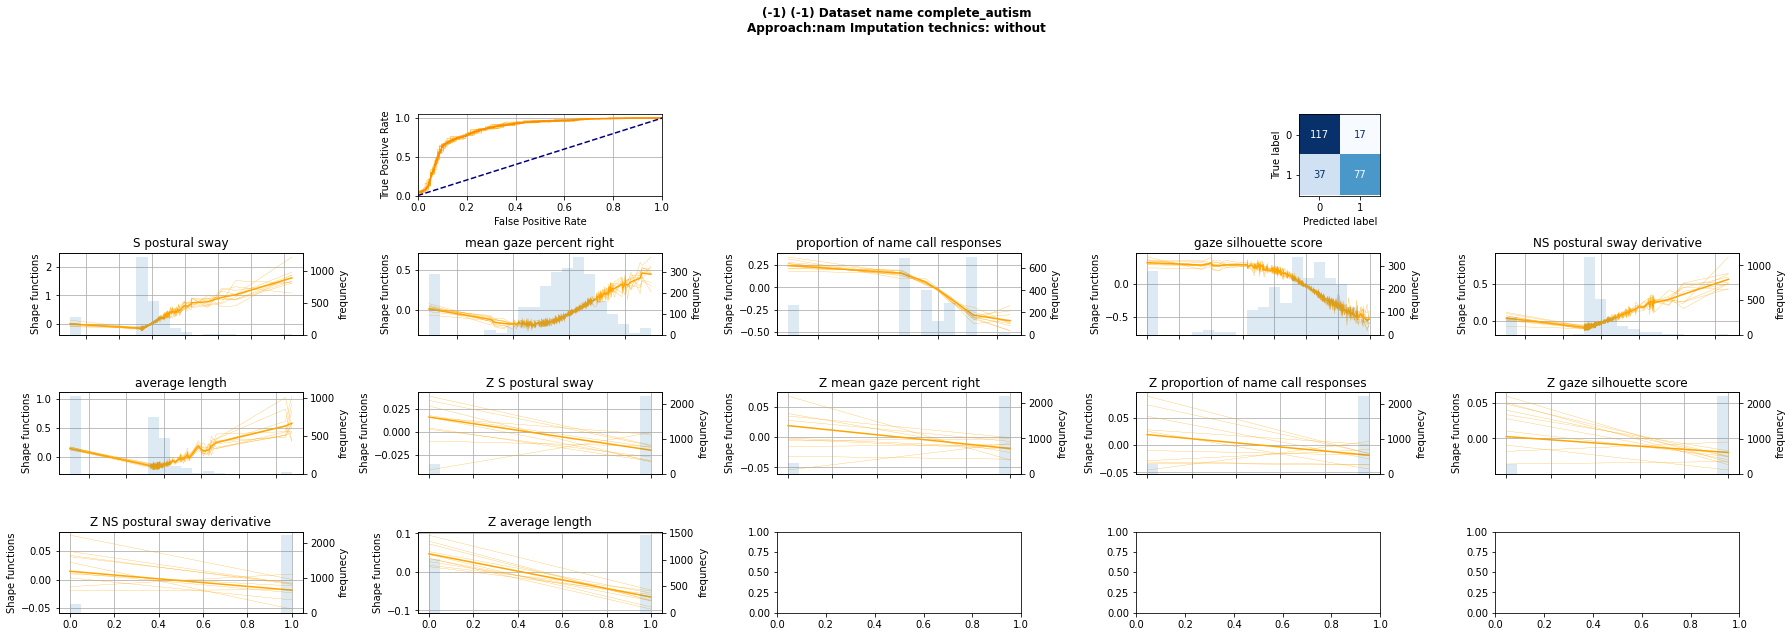

In [7]:
exp = Experiments(data.dataset_name,
                dataset=data, 
                approach='nam', 
                proportion_train=PROPORTION_TRAIN, 
                resolution=RESOLUTION, 
                bandwidth=BANDWIDTH, 
                previous_experiment=None,        
                verbosity=1, 
                debug=True, 
                save_experiment=False)

exp.fit_predict(num_cv=16)
exp.plot()
                        
                

## `Explanable Boosting Machine` approach

Encoding 237 (train) and 0 (test) missing values with -5.


Accuracy  F1 score (2 PPVxTPR/(PPV+TPR))  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)
0     0.797                           0.795                                   0.596                                              0.816                                                        0.78                                            0.775                            0.821                                   0.184                             0.225                            0.179

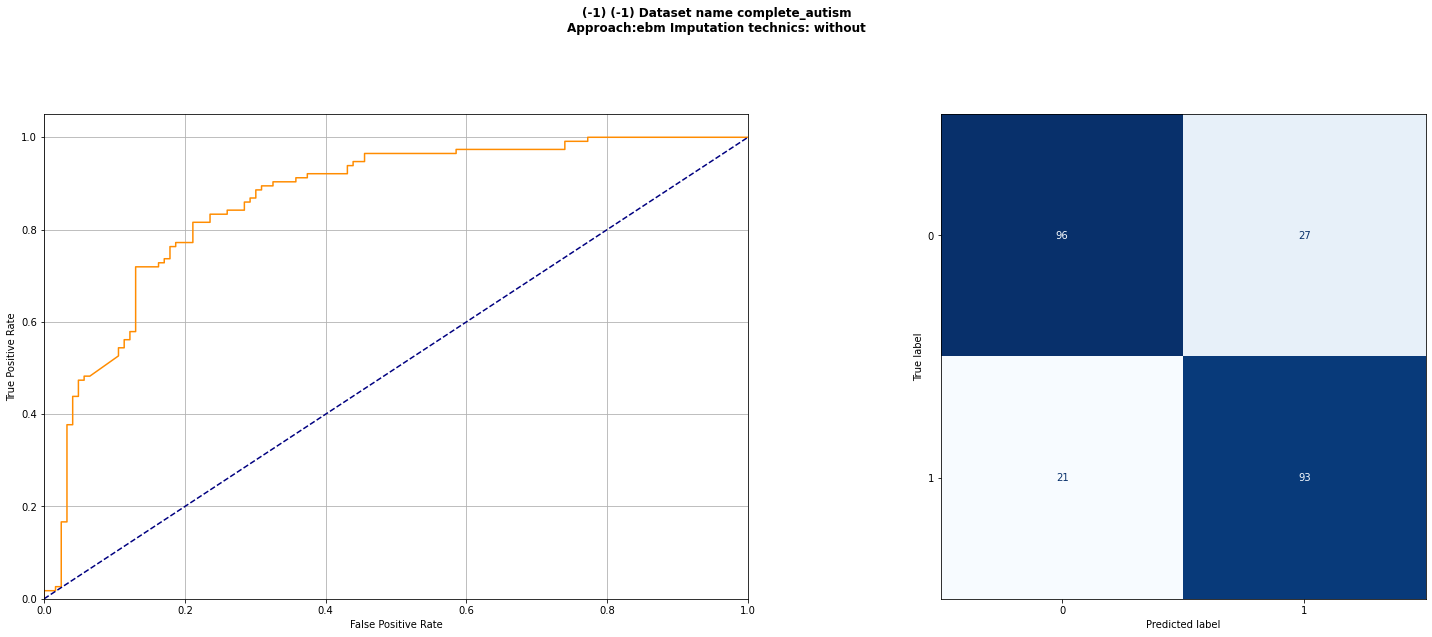

<!-- http://127.0.0.1:7280/139906984816528/ -->

In [20]:
exp = Experiments(data.dataset_name,
                dataset=data, 
                approach='ebm', 
                proportion_train=PROPORTION_TRAIN, 
                resolution=RESOLUTION, 
                bandwidth=BANDWIDTH, 
                previous_experiment=None,        
                verbosity=1, 
                debug=True, 
                save_experiment=False)

exp.fit_predict(num_cv=16)
exp.plot()
                        
                

## `Logistic Regression` approach

Encoding 237 (train) and 0 (test) missing values with -5.


Accuracy  F1 score (2 PPVxTPR/(PPV+TPR))  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)
0     0.789                           0.783                                   0.578                                              0.789                                                       0.789                                            0.776                            0.802                                   0.211                             0.224                            0.198

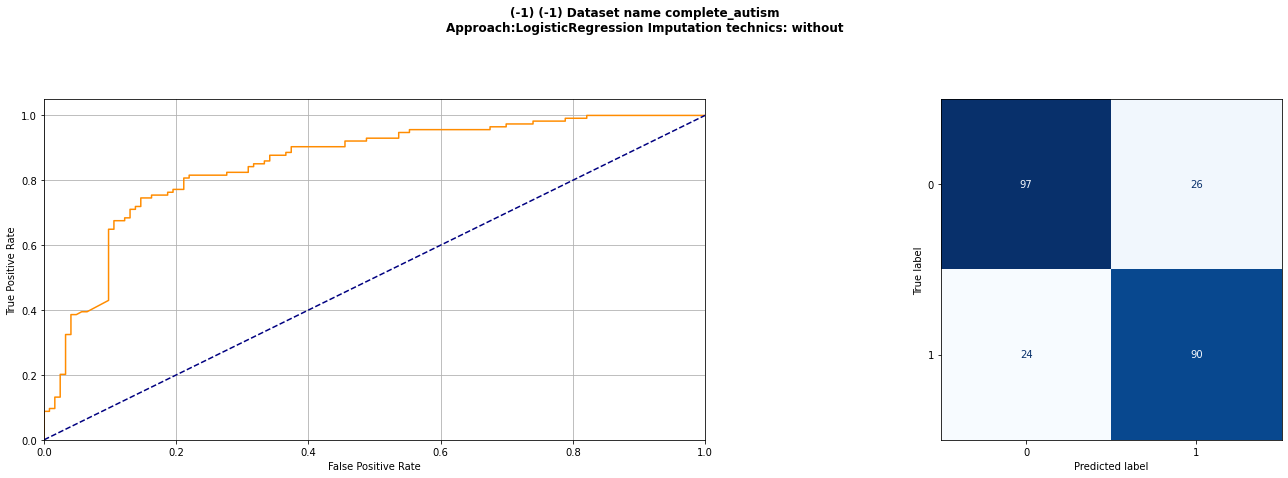

Not implemented yet.


In [21]:
exp = Experiments(data.dataset_name,
                dataset=data, 
                approach='LogisticRegression', 
                proportion_train=PROPORTION_TRAIN, 
                resolution=RESOLUTION, 
                bandwidth=BANDWIDTH, 
                previous_experiment=None,        
                verbosity=1, 
                debug=True, 
                save_experiment=False)

exp.fit_predict(num_cv=16)
exp.plot()
                        
                

## `DecisionTree` approach

Encoding 237 (train) and 0 (test) missing values with -5.


Accuracy  F1 score (2 PPVxTPR/(PPV+TPR))  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)
0     0.751                           0.742                                   0.502                                              0.746                                                       0.756                                            0.739                            0.762                                   0.254                             0.261                            0.238

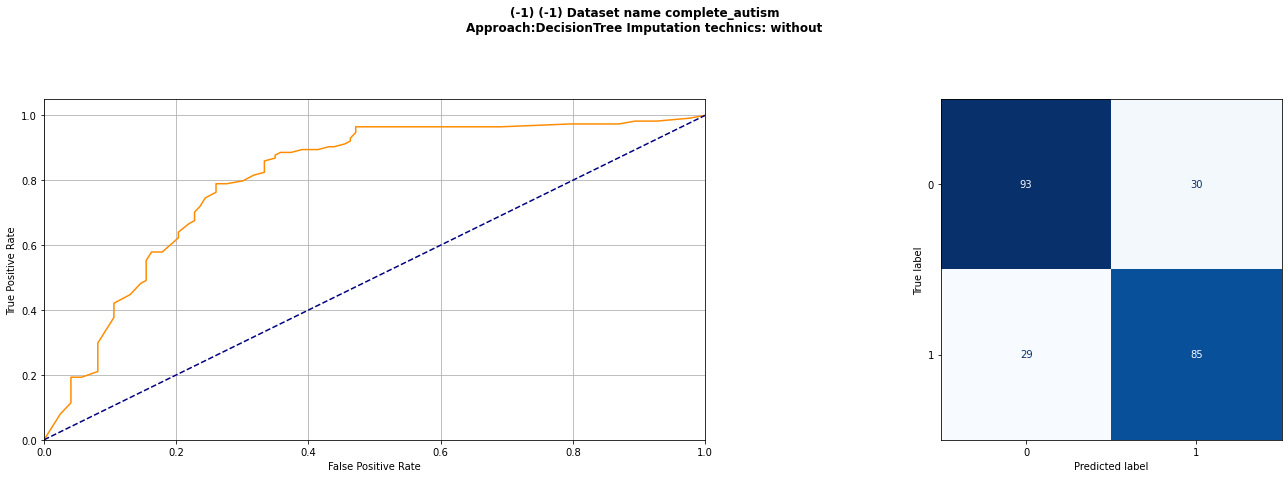

Not implemented yet.


In [22]:
exp = Experiments(data.dataset_name,
                dataset=data, 
                approach='DecisionTree', 
                proportion_train=PROPORTION_TRAIN, 
                resolution=RESOLUTION, 
                bandwidth=BANDWIDTH, 
                previous_experiment=None,        
                verbosity=1, 
                debug=True, 
                save_experiment=False)

exp.fit_predict(num_cv=16)
exp.plot()
                        
                

## `XGBoost` approach

# Experiments

* This section aims at answering a few questions related to the different algorithms used, with the aim of optimizing our classification framework.

**Parameters or potential settings**

* The approach used, which could be Logistic Regression, Decision Tree, Explainable Boosting Machine, Neural Additive models, or XGBoost.
* The use or not of indicator variables as inputs. 
* The scaling of the data. 
* The imputation approach when the learning algorithms does not handle them by design. It could be constant imputation (called encoding here), or conditional imputation (mean, knn, or mice).
* The sampling method in the case of imbalance learning (either no down-sampling, vanilla (random sampling of the minority class until classes are balanced), or SMOTE (a more elaborated sampling).
* The number of features, between 2 and 6. 
* The number of folds when cross-validating the results. 

**Notes on the classification pipeline:**

* Two datasets are age-matched but one (scenario `asd_td_age_matched_n_balanced`) lead to relatively balanced classes, whereas the scenario `asd_td_age_matched_n_unbalanced` has slightly younger kids and so leverage the amount of young neuro-typical kids, and is more unbalanced. 
* No searches on hyper-parameters are performed on each of the approach. Cross-validation is performed with the stratified inner-fold being left-out, the model is fitted on the training set, and the prediction of the test set is done with predictions stored for later evaluation of performances. 
* since a lot of settings parameters are tested, we test all of the hypothesis with a default setting that is: Encoding of the missing variables, scaling of the data, no use of indicator variables, no down-sampling (???), and a 16-fold cross-validation.
* Features selection were made for the two scenario suing the features with the higher importance based on xgboost importance map.
* Classification here is between autistic and neurotypical participants.



**Among the questions at stakes:**

* Experiment 1: Shall we use indicator variables? For each scenario (columns of axes), ad each dimension of the problem (rows of axes) , x is the `use_of_indicator_variables`, y is an indicator of performances (typically the F1 score), and the hue variable are the approaches. The plots are performed for no imputations, 
* Experiement 2: Shall we scale data or not ? 
* Experiment X: for the algorithms handling missing variables (xgboost, nam with encoding) , shall we let them be missing, or imputed ? 

## Experiment 1.  `use_missing_indicator_variables`

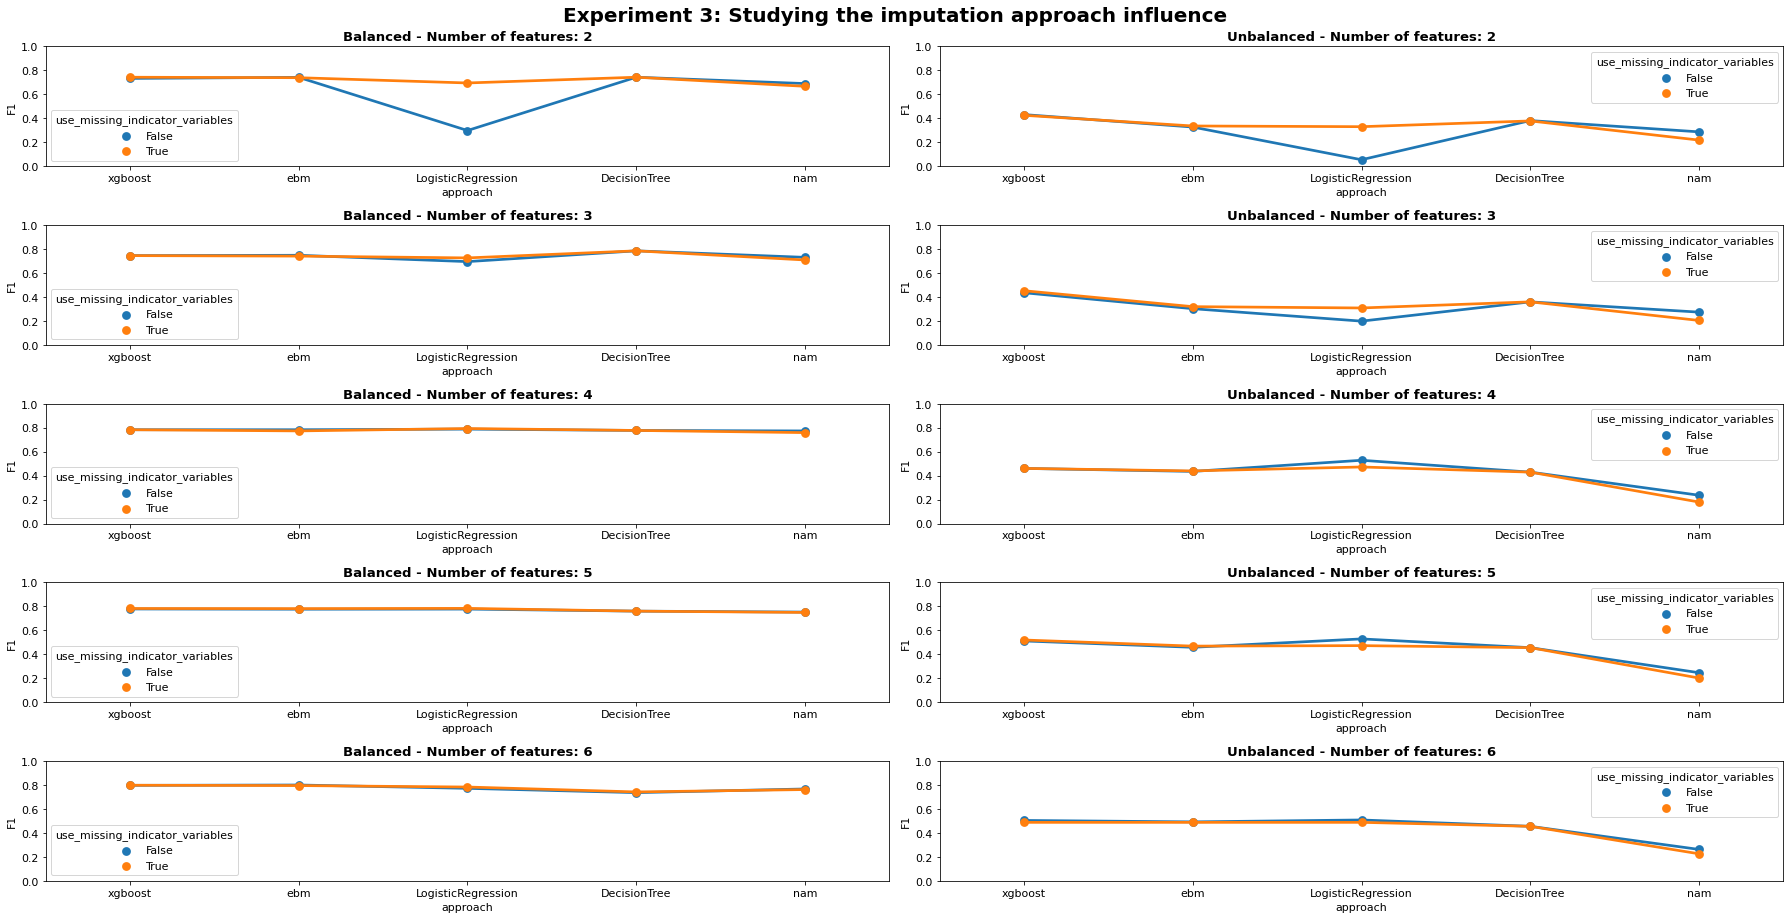

In [239]:
fig, axes = plt.subplots(5, 2, figsize=(25, 13))
fig.suptitle("Experiment 3: Studying the imputation approach influence", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique(), reverse=False)):
    for j, (scenario, label) in enumerate(zip(['asd_td_age_matched_n_balanced', 'asd_td_age_matched_n_unbalanced'], ['Balanced', 'Unbalanced'])):

        results = df[(df['missing_data_handling'] == 'encoding') &
                     (df['sampling_method'] == 'without') &
                     (df['scale_data'] == True) &
                     (df['num_cv'] == 16) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]

        assert len(results) == 5*2

        axes[i][j] = sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1", hue='use_missing_indicator_variables', ci='sd', ax = axes[i][j])
        axes[i][j].set_ylim([0,1])
        axes[i][j].set_title("{} - Number of features: {}".format(label, n_features), weight='bold')

    plt.tight_layout()

imputation_method = constant


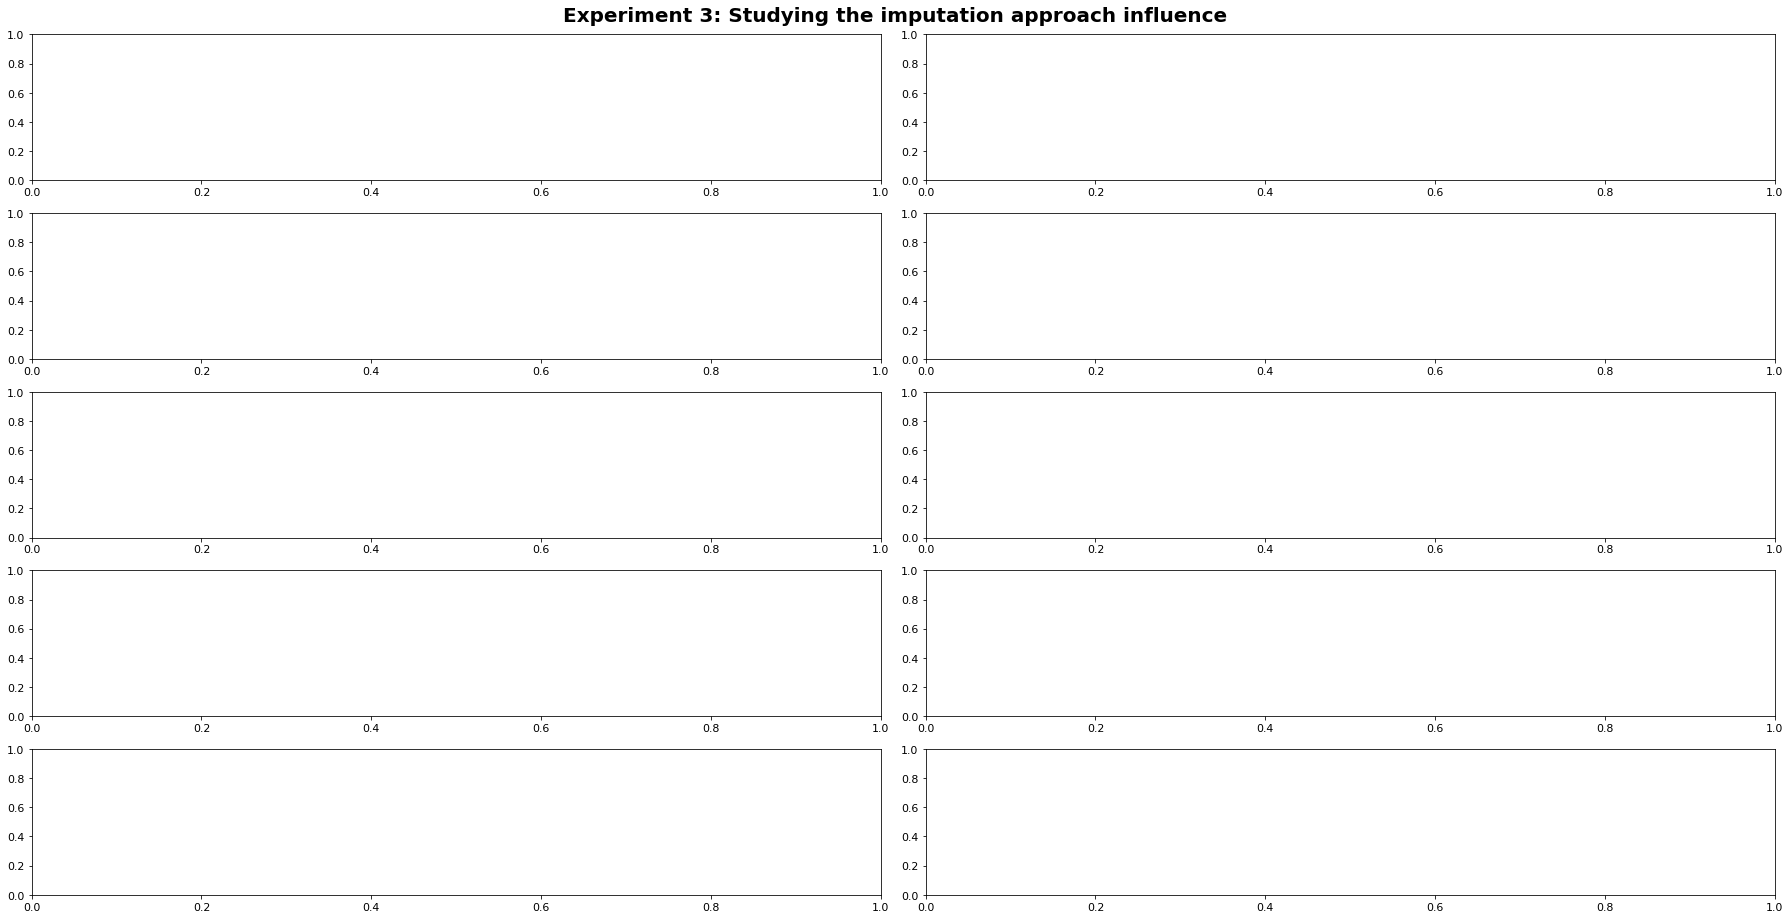

imputation_method = mice


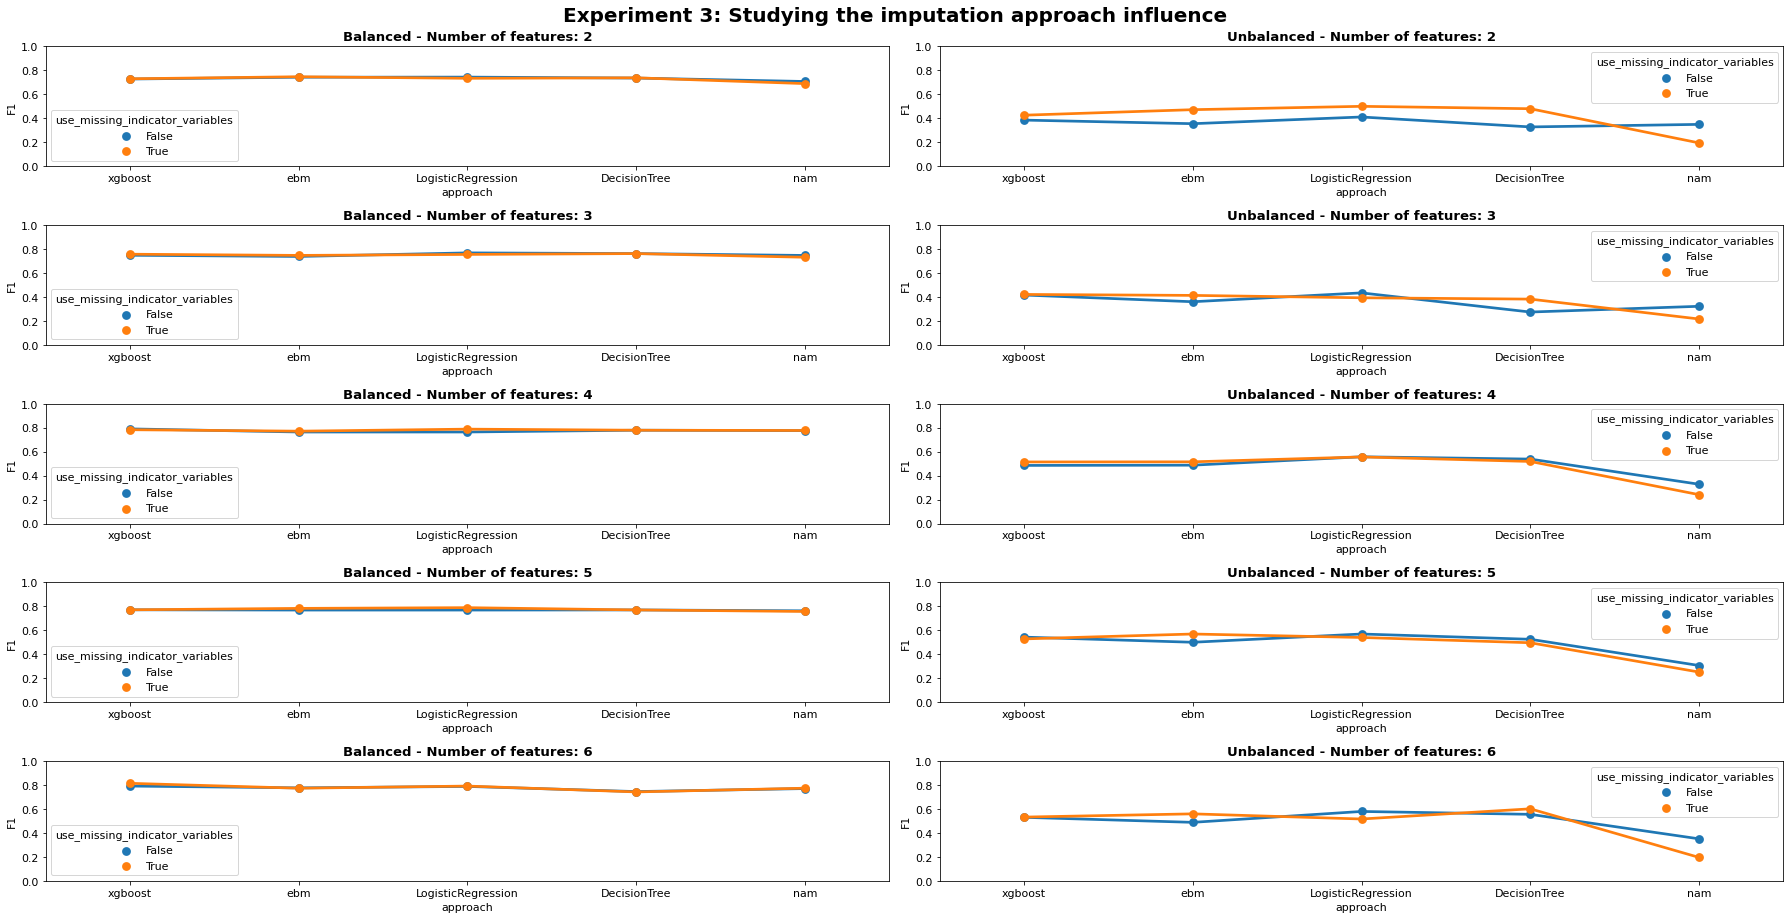

imputation_method = mean


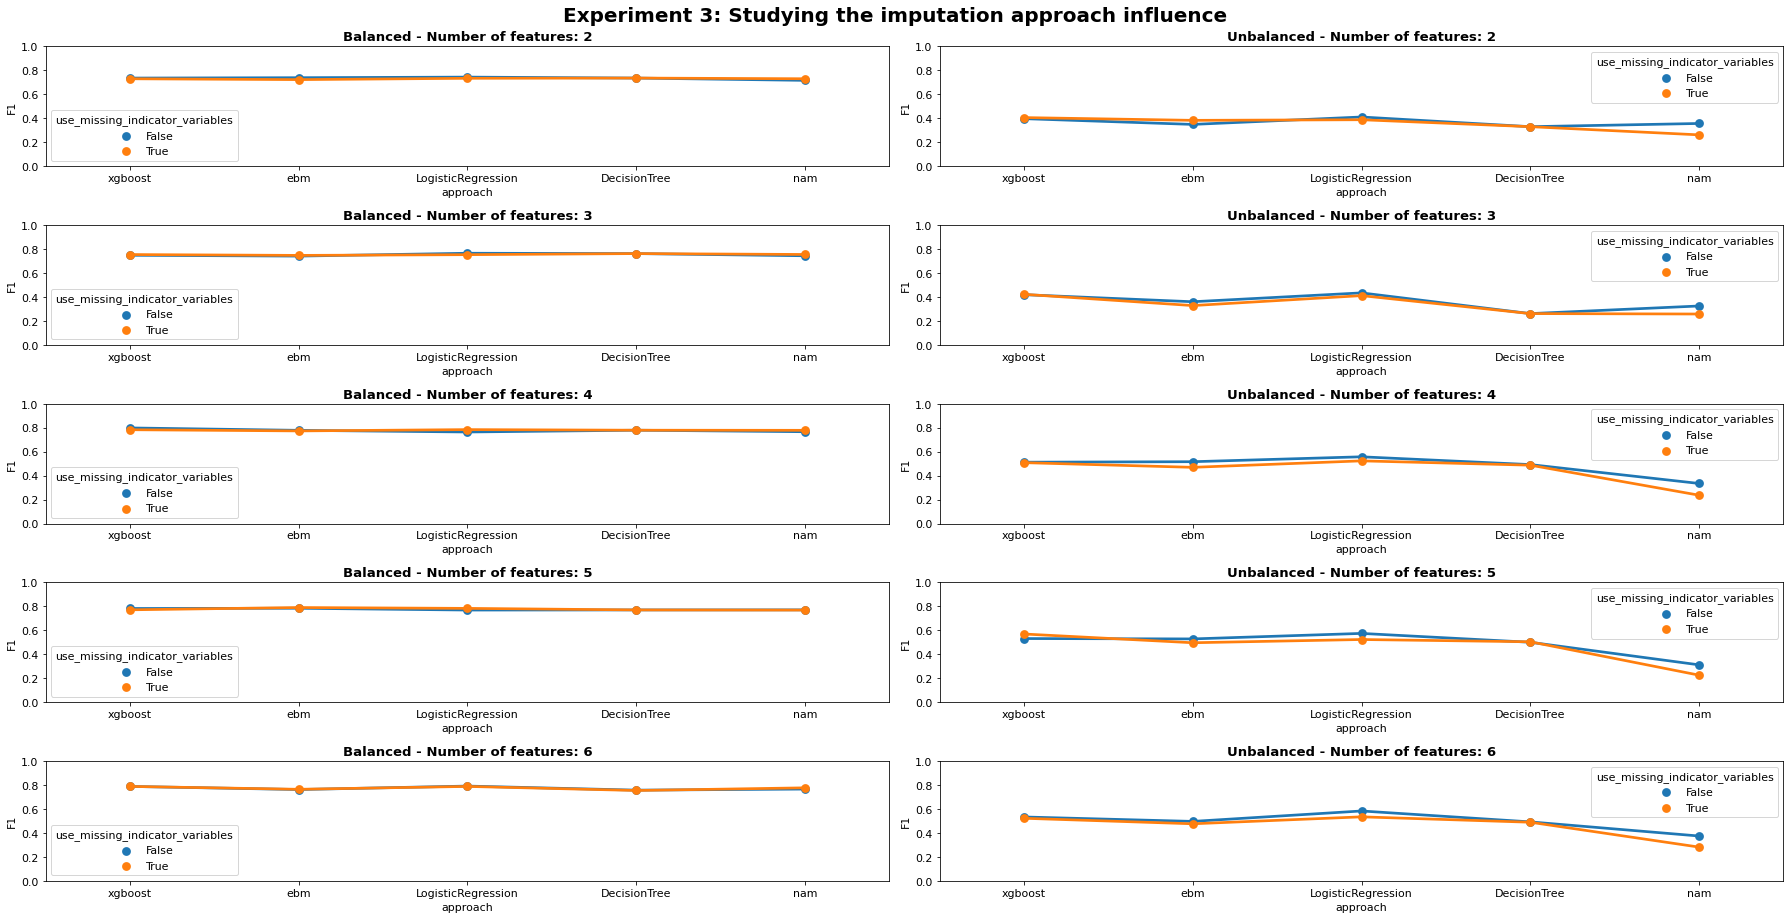

imputation_method = knn


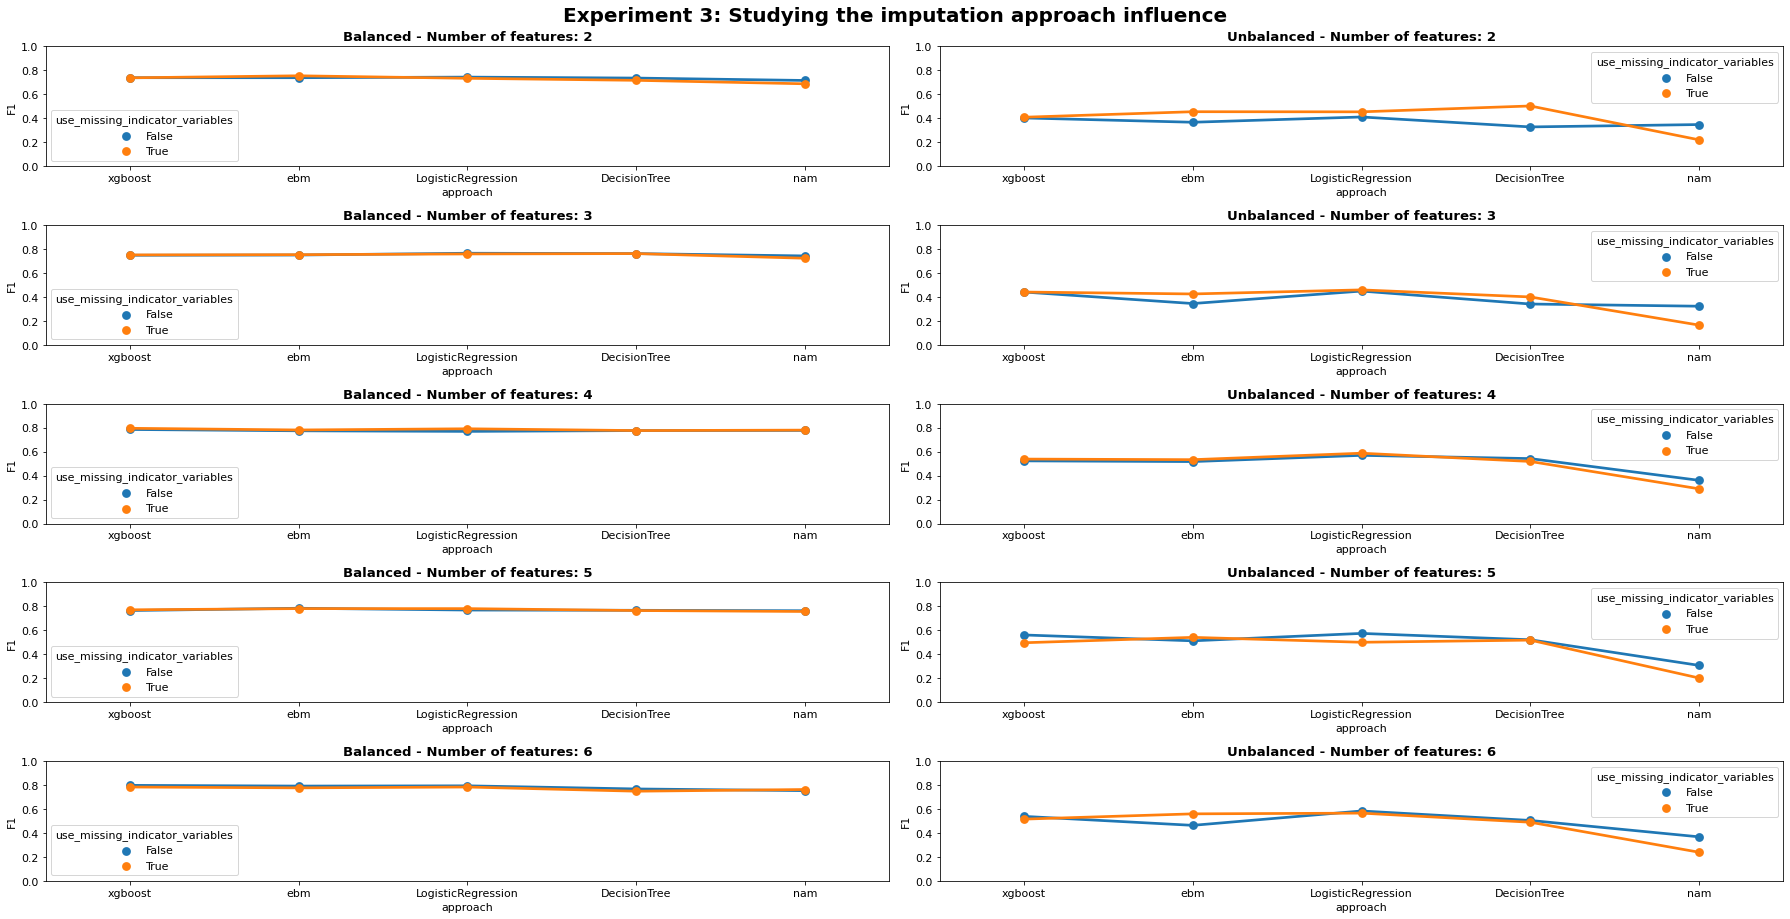

imputation_method = without


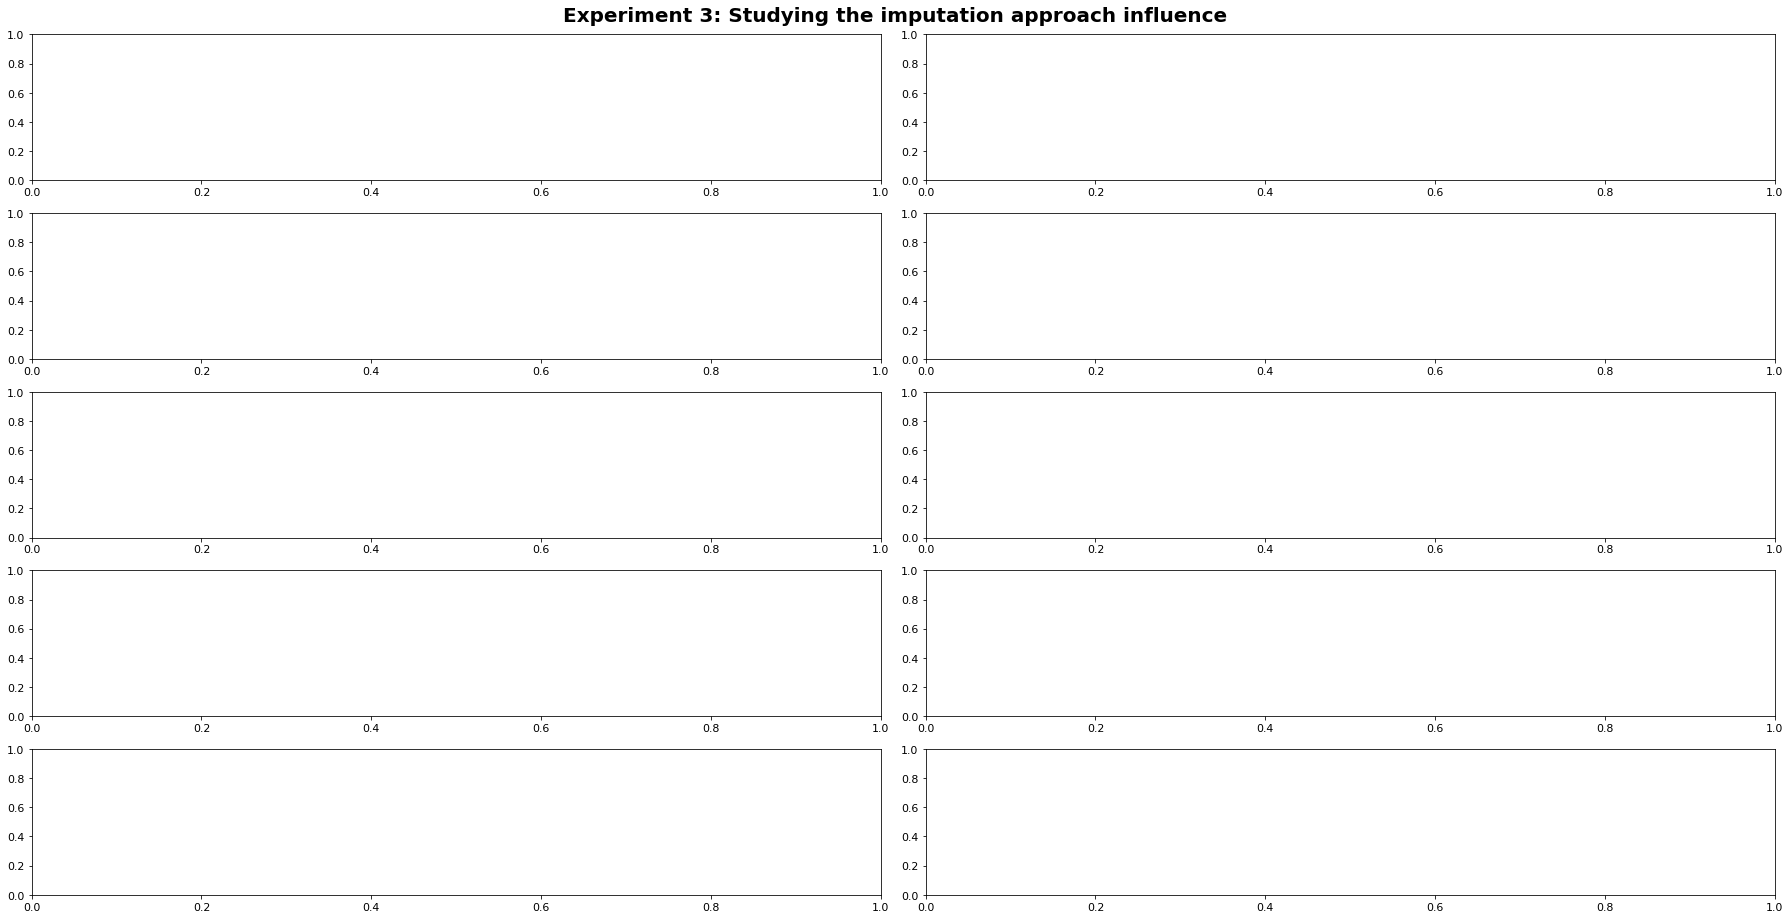

In [261]:
varying_condition = "imputation_method"

for var in list(df[varying_condition].unique()):
    print("{} = {}".format(varying_condition, var))

    fig, axes = plt.subplots(5, 2, figsize=(25, 13))
    fig.suptitle("Experiment 3: Studying the imputation approach influence", weight='bold', fontsize=20)

    for i, n_features in enumerate(sorted(df['n_features'].unique(), reverse=False)):
        for j, (scenario, label) in enumerate(zip(['asd_td_age_matched_n_balanced', 'asd_td_age_matched_n_unbalanced'], ['Balanced', 'Unbalanced'])):

            results = df[(df['missing_data_handling'] == 'imputation') &
                         (df['sampling_method'] == 'without') &
                         (df['scale_data'] == True) &
                         (df['num_cv'] == 16) &
                         (df['scenario'] == scenario) &
                         (df['n_features'] == n_features)]
            
            results = results[results[varying_condition]==var]
            
            if len(results)==0:
                continue

            #assert len(results) == 5*2

            axes[i][j] = sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1", hue='use_missing_indicator_variables', ci='sd', ax = axes[i][j])
            axes[i][j].set_ylim([0,1])
            axes[i][j].set_title("{} - Number of features: {}".format(label, n_features), weight='bold')

    plt.tight_layout()
    plt.show()

## Experiment 2  `scale_data`

In [240]:
df[df['scale_data']==False]

dataset_name  experiment_number            approach missing_data_handling imputation_method                                      features_name  n_features  use_missing_indicator_variables  scale_data sampling_method                         scenario  num_samples  imbalance_ratio  ratio_of_missing_values  ratio_missing_per_class_0  ratio_missing_per_class_1  resolution  bandwidth  estimation_time  num_cv     auc  Accuracy      F1     MCC  Sensitivity  Specificity  Precision     PPV     NPV     FNR     FDR     FOR
1     complete_autism               3643             xgboost            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           4                             True       False           smote    asd_td_age_matched_n_balanced          237         0.926829                 0.058544                   0.030488                   0.088816          20        0.2         2.589072       8     NaN    0.7760  0.7820  0.5590       0.8330       0.7240     0.7360  0.7360  0.8240  0.1670  0.2640  0.1760
2     complete_autism               4745                 ebm            imputation              mean     ['S_postural_sway', 'mean_gaze_percent_right']           2                            False       False         vanilla    asd_td_age_matched_n_balanced          237         0.926829                 0.118143                   0.060976                   0.179825          20        0.2        11.406883       8     NaN    0.7430  0.7450  0.4880       0.7810       0.7070     0.7120  0.7120  0.7770  0.2190  0.2880  0.2230
3     complete_autism               4306  LogisticRegression            imputation               knn  ['S_postural_sway', 'mean_gaze_percent_right',...           3                            False       False           smote  asd_td_age_matched_n_unbalanced          297         0.320000                 0.088664                   0.059259                   0.180556          20        0.2         0.036443       8     NaN    0.7950  0.4300  0.3540       0.3190       0.9470     0.6570  0.6570  0.8130  0.6810  0.3430  0.1870
4     complete_autism               4655                 ebm            imputation              mean  ['S_postural_sway', 'mean_gaze_percent_right',...           4                             True       False         vanilla    asd_td_age_matched_n_balanced          237         0.926829                 0.058544                   0.030488                   0.088816          20        0.2        51.596157      16     NaN    0.7760  0.7730  0.5530       0.7890       0.7640     0.7560  0.7560  0.7970  0.2110  0.2440  0.2030
6     complete_autism               3858             xgboost            imputation               knn  ['S_postural_sway', 'mean_gaze_percent_right',...           4                             True       False         without  asd_td_age_matched_n_unbalanced          297         0.320000                 0.044192                   0.029444                   0.090278          20        0.2         5.129943      16     NaN    0.7640  0.5070  0.3520       0.5000       0.8490     0.5140  0.5140  0.8410  0.5000  0.4860  0.1590
...               ...                ...                 ...                   ...               ...                                                ...         ...                              ...         ...             ...                              ...          ...              ...                      ...                        ...                        ...         ...        ...              ...     ...     ...       ...     ...     ...          ...          ...        ...     ...     ...     ...     ...     ...
4949  complete_autism               3556  LogisticRegression            imputation              mice     ['S_postural_sway', 'mean_gaze_percent_right']           2                            False       False         vanilla  asd_td_age_matched_n_unbalanced          297         0.320000                 0.090909               

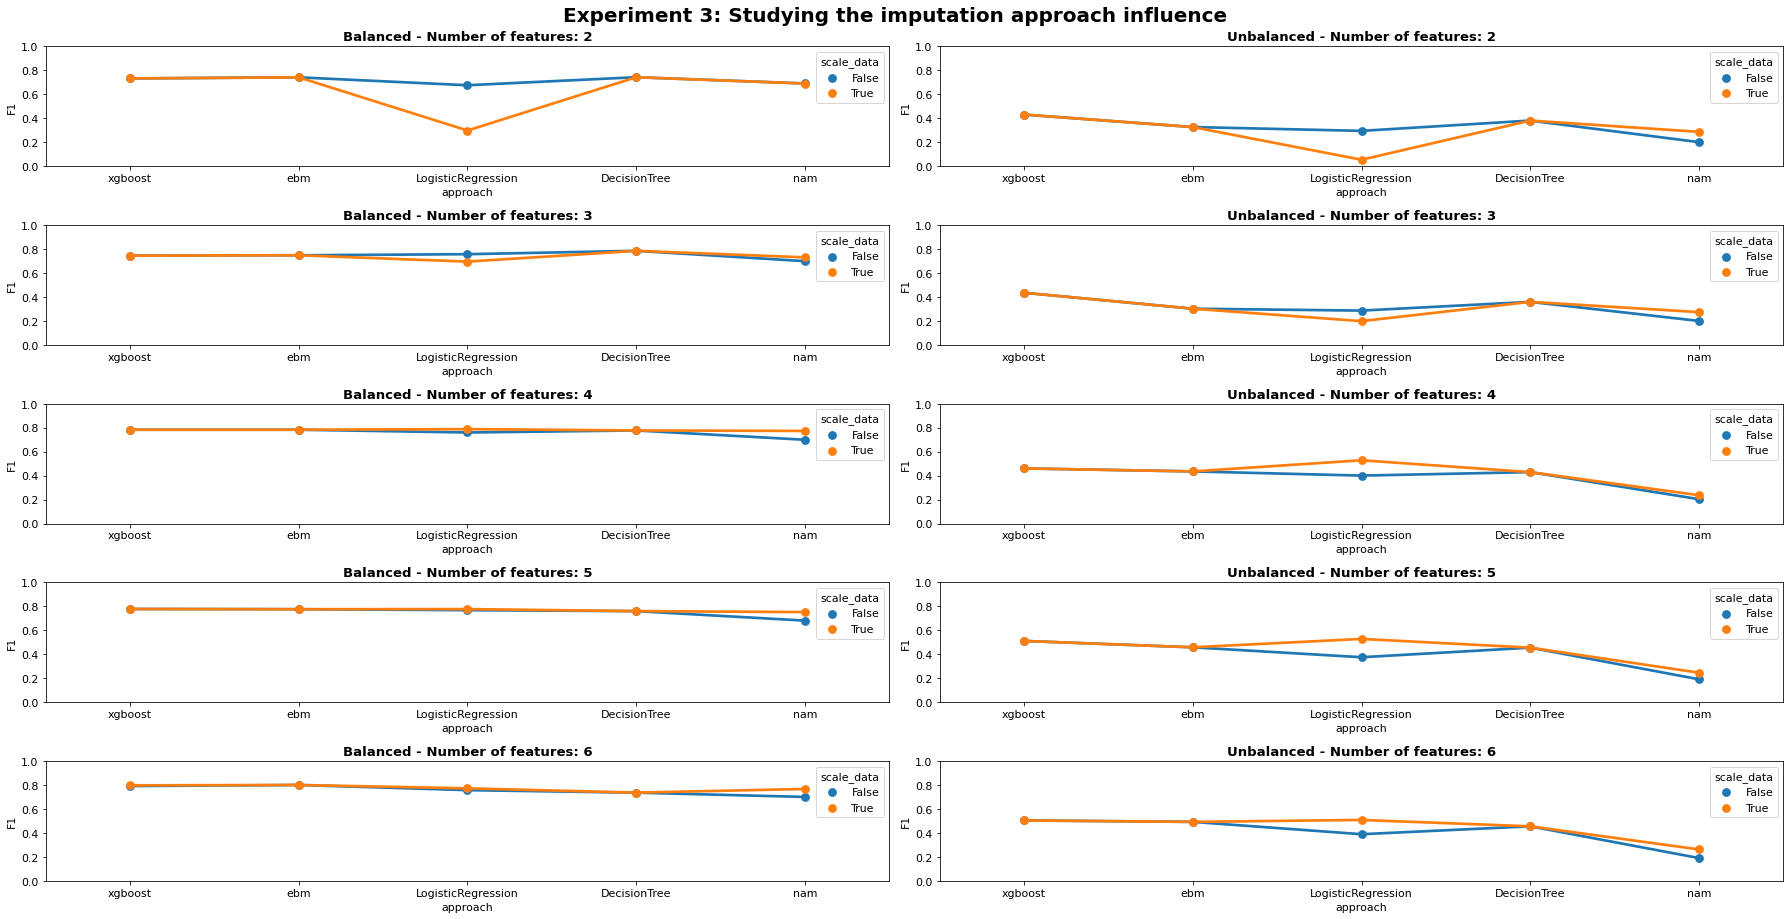

In [241]:

fig, axes = plt.subplots(5, 2, figsize=(25, 13))
fig.suptitle("Experiment 3: Studying the imputation approach influence", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique(), reverse=False)):
    for j, (scenario, label) in enumerate(zip(['asd_td_age_matched_n_balanced', 'asd_td_age_matched_n_unbalanced'], ['Balanced', 'Unbalanced'])):

        results = df[(df['missing_data_handling'] == 'encoding') &
                     (df['use_missing_indicator_variables'] == False) &
                     (df['sampling_method'] == 'without') &
                     (df['num_cv'] == 16) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]
        #assert len(results) == 5*2, print(len(results))
        axes[i][j] = sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1", hue='scale_data', ci='sd', ax = axes[i][j])
        axes[i][j].set_ylim([0,1])
        axes[i][j].set_title("{} - Number of features: {}".format(label, n_features), weight='bold')

    plt.tight_layout()

## Experiment 3. `Imputation approach`

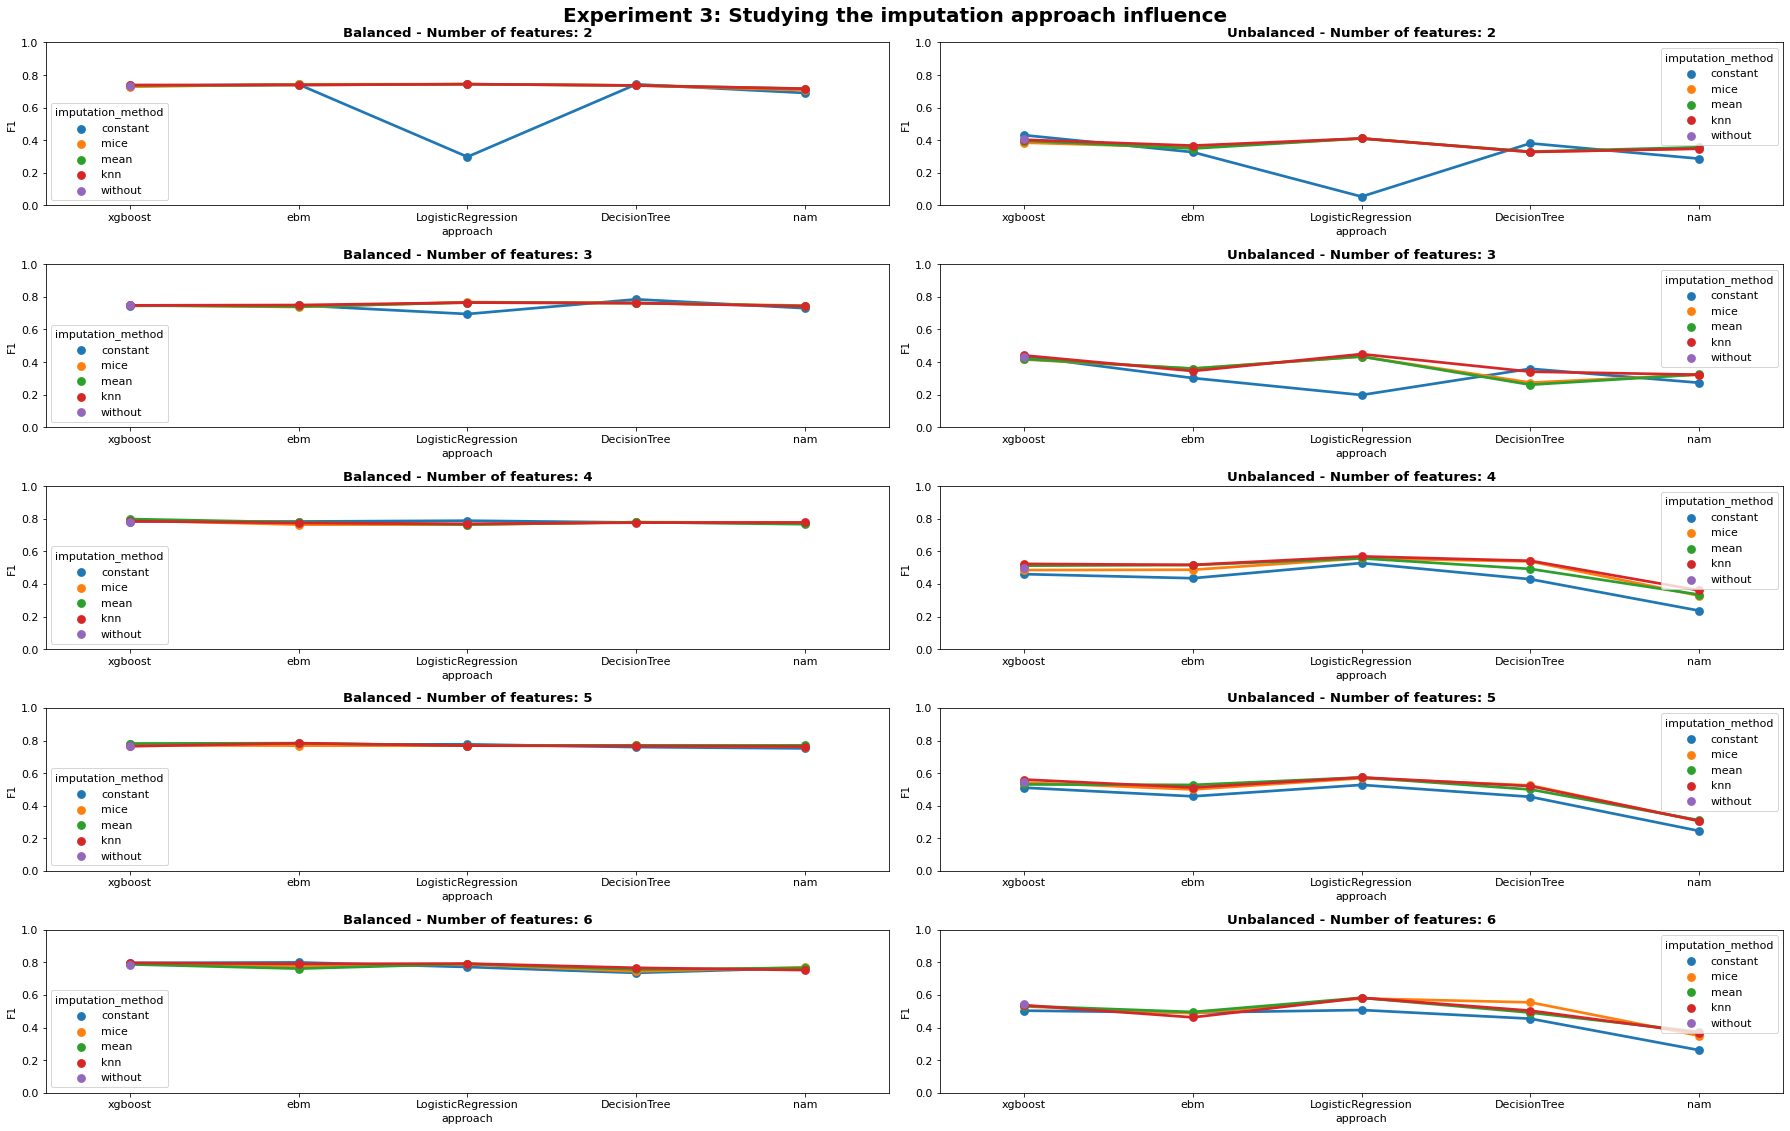

In [242]:
df.loc[(df['missing_data_handling']=='encoding'), 'imputation_method'] = 'constant'

fig, axes = plt.subplots(5, 2, figsize=(25, 16))
fig.suptitle("Experiment 3: Studying the imputation approach influence", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique(), reverse=False)):
    for j, (scenario, label) in enumerate(zip(['asd_td_age_matched_n_balanced', 'asd_td_age_matched_n_unbalanced'], ['Balanced', 'Unbalanced'])):

        results = df[(df['use_missing_indicator_variables'] == False) &
                     (df['sampling_method'] == 'without') &
                     (df['scale_data'] == True) &
                     (df['num_cv'] == 16) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]
        try:

            #assert len(results) == 5*5
            axes[i][j] = sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1", hue='imputation_method', hue_order=df['imputation_method'].unique(), ci='sd', ax = axes[i][j])
            axes[i][j].set_ylim([0,1])
            axes[i][j].set_title("{} - Number of features: {}".format(label, n_features), weight='bold')
        except:
            pass
    plt.tight_layout()

## Experiment 4. `Sampling approach`

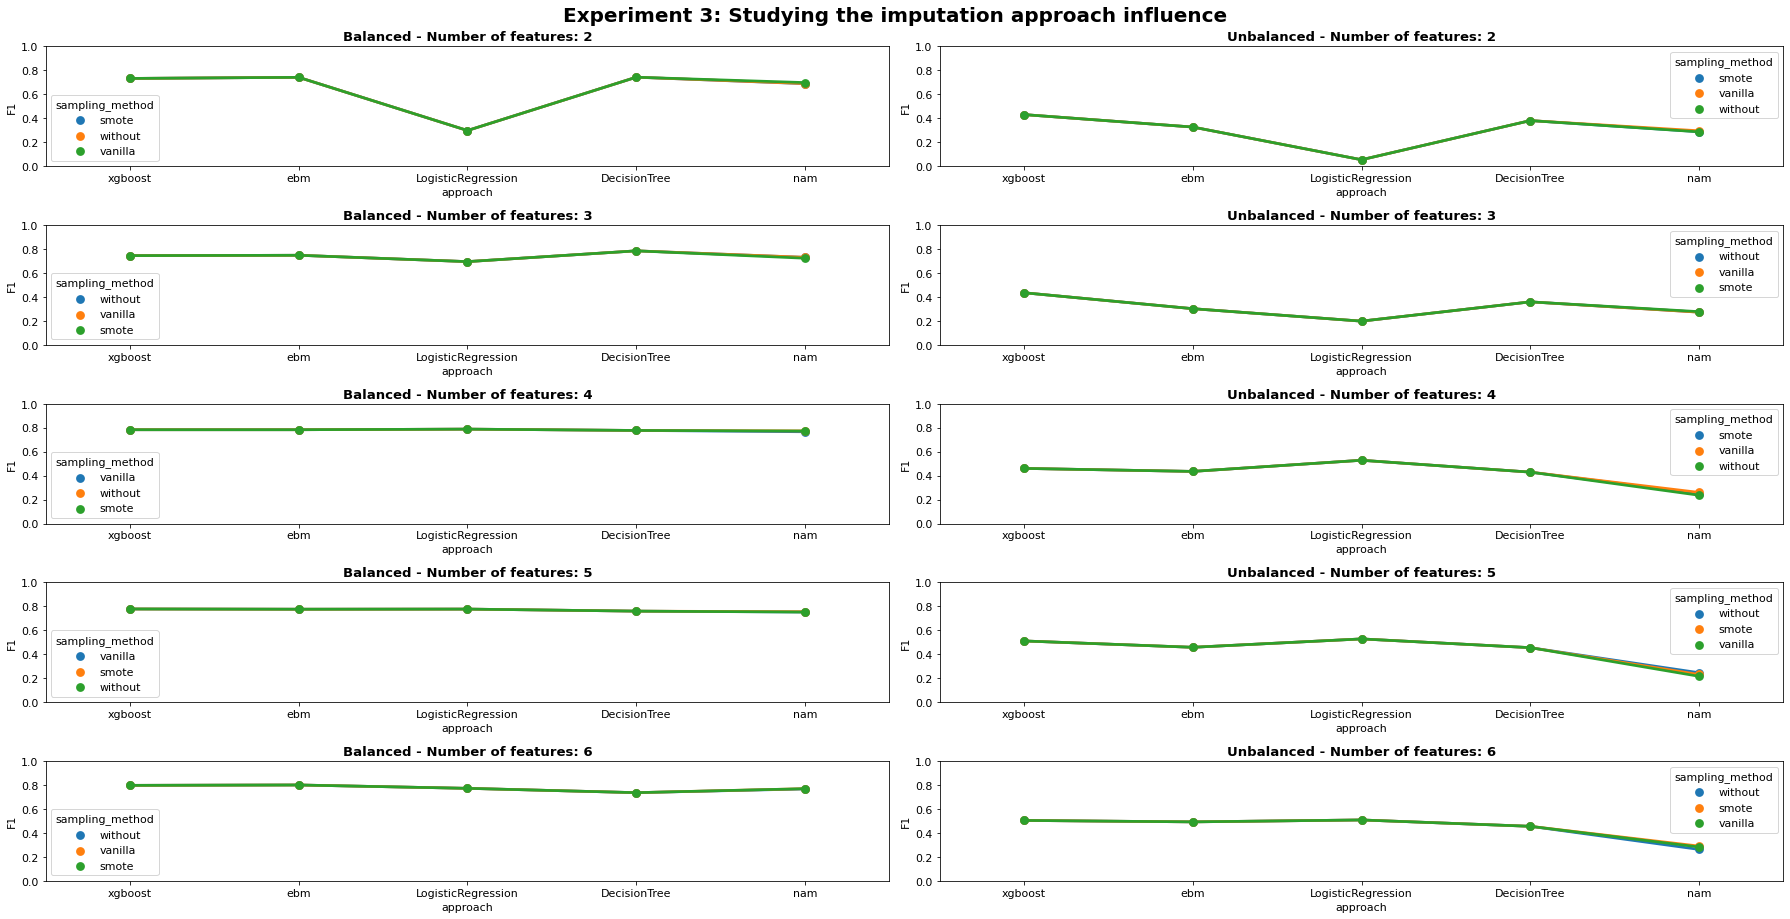

In [243]:

fig, axes = plt.subplots(5, 2, figsize=(25, 13))
fig.suptitle("Experiment 3: Studying the imputation approach influence", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique(), reverse=False)):
    for j, (scenario, label) in enumerate(zip(['asd_td_age_matched_n_balanced', 'asd_td_age_matched_n_unbalanced'], ['Balanced', 'Unbalanced'])):

        results = df[(df['missing_data_handling'] == 'encoding') &
                     (df['use_missing_indicator_variables'] == False) &
                     (df['scale_data'] == True) &
                     (df['num_cv'] == 16) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]
        assert len(results) == 5*3
        axes[i][j] = sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1", hue='sampling_method', ci='sd', ax = axes[i][j])
        axes[i][j].set_ylim([0,1])
        axes[i][j].set_title("{} - Number of features: {}".format(label, n_features), weight='bold')

    plt.tight_layout()

## Experiment 5. `num_cv`

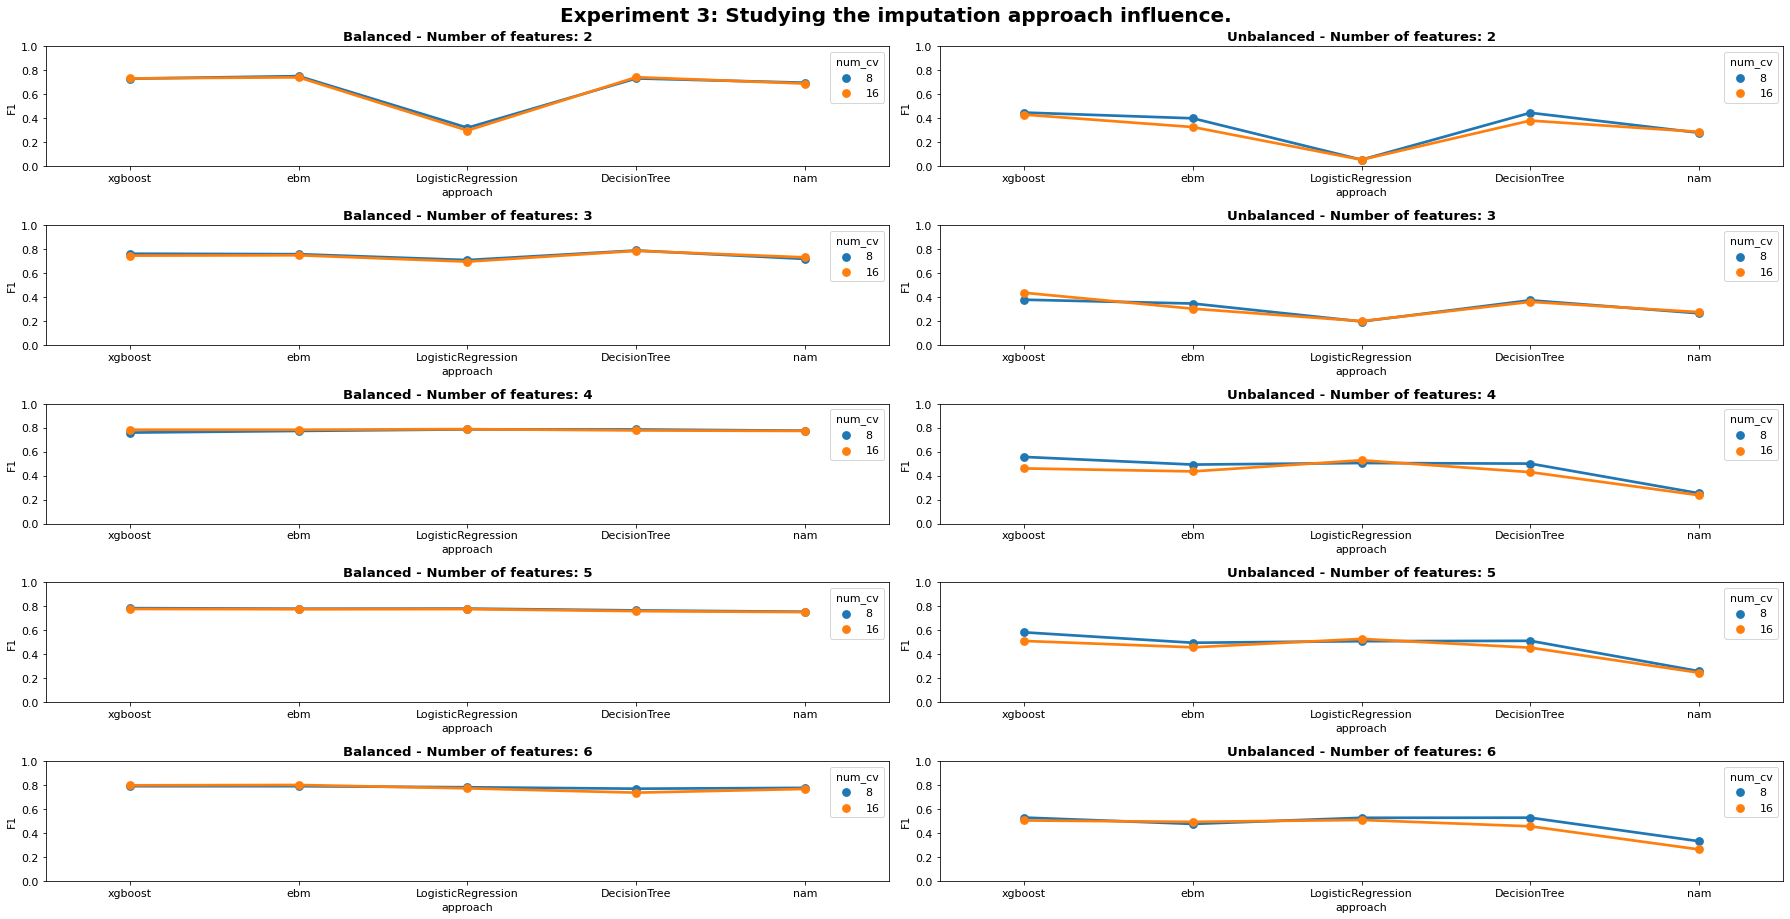

In [244]:
fig, axes = plt.subplots(5, 2, figsize=(25, 13))
fig.suptitle("Experiment 3: Studying the imputation approach influence.", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique(), reverse=False)):
    for j, (scenario, label) in enumerate(zip(['asd_td_age_matched_n_balanced', 'asd_td_age_matched_n_unbalanced'], ['Balanced', 'Unbalanced'])):

        results = df[(df['missing_data_handling'] == 'encoding') &
                     (df['use_missing_indicator_variables'] == False) &
                     (df['scale_data'] == True) &
                     (df['sampling_method'] == 'without') &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]
        assert len(results) == 5*2

        axes[i][j] = sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1", hue='num_cv', ci='sd', ax = axes[i][j])
        axes[i][j].set_ylim([0,1])
        axes[i][j].set_title("{} - Number of features: {}".format(label, n_features), weight='bold')

    plt.tight_layout()

## Experiment 6. `n_features`

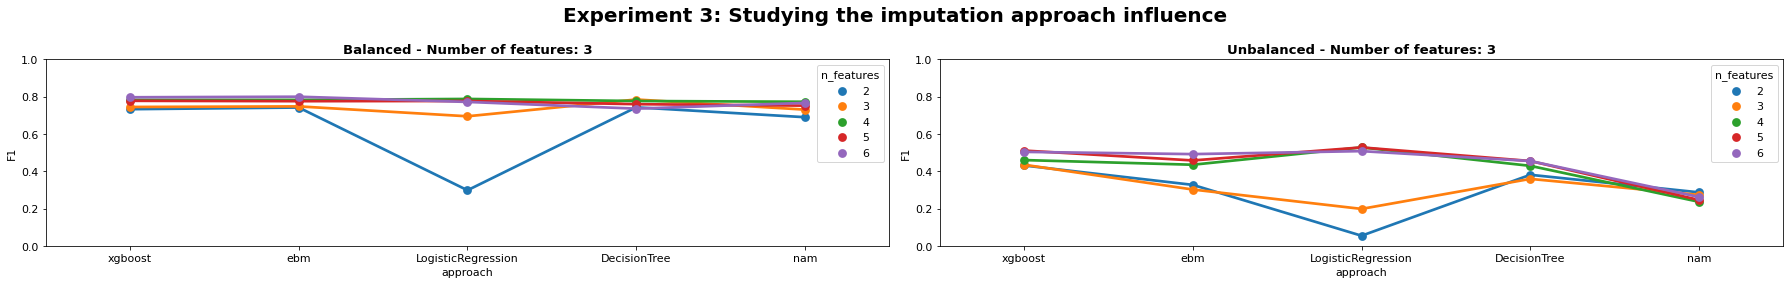

In [247]:

fig, axes = plt.subplots(1, 2, figsize=(25, 4));axes = axes[np.newaxis, :]
fig.suptitle("Experiment 3: Studying the imputation approach influence", weight='bold', fontsize=20)

i=0
for j, (scenario, label) in enumerate(zip(['asd_td_age_matched_n_balanced', 'asd_td_age_matched_n_unbalanced'], ['Balanced', 'Unbalanced'])):

    results = df[(df['missing_data_handling'] == 'encoding') &
                 (df['use_missing_indicator_variables'] == False) &
                 (df['scale_data'] == True) &
                 (df['num_cv'] == 16) &
                 (df['sampling_method'] == 'without') &
                 (df['scenario'] == scenario)]

    assert len(results) == 5*5

    axes[i][j] = sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1", hue='n_features', ci='sd', ax = axes[i][j])
    axes[i][j].set_ylim([0,1])
    axes[i][j].set_title("{} - Number of features: {}".format(label, n_features), weight='bold')

plt.tight_layout()

## Experiment 7. `approach`

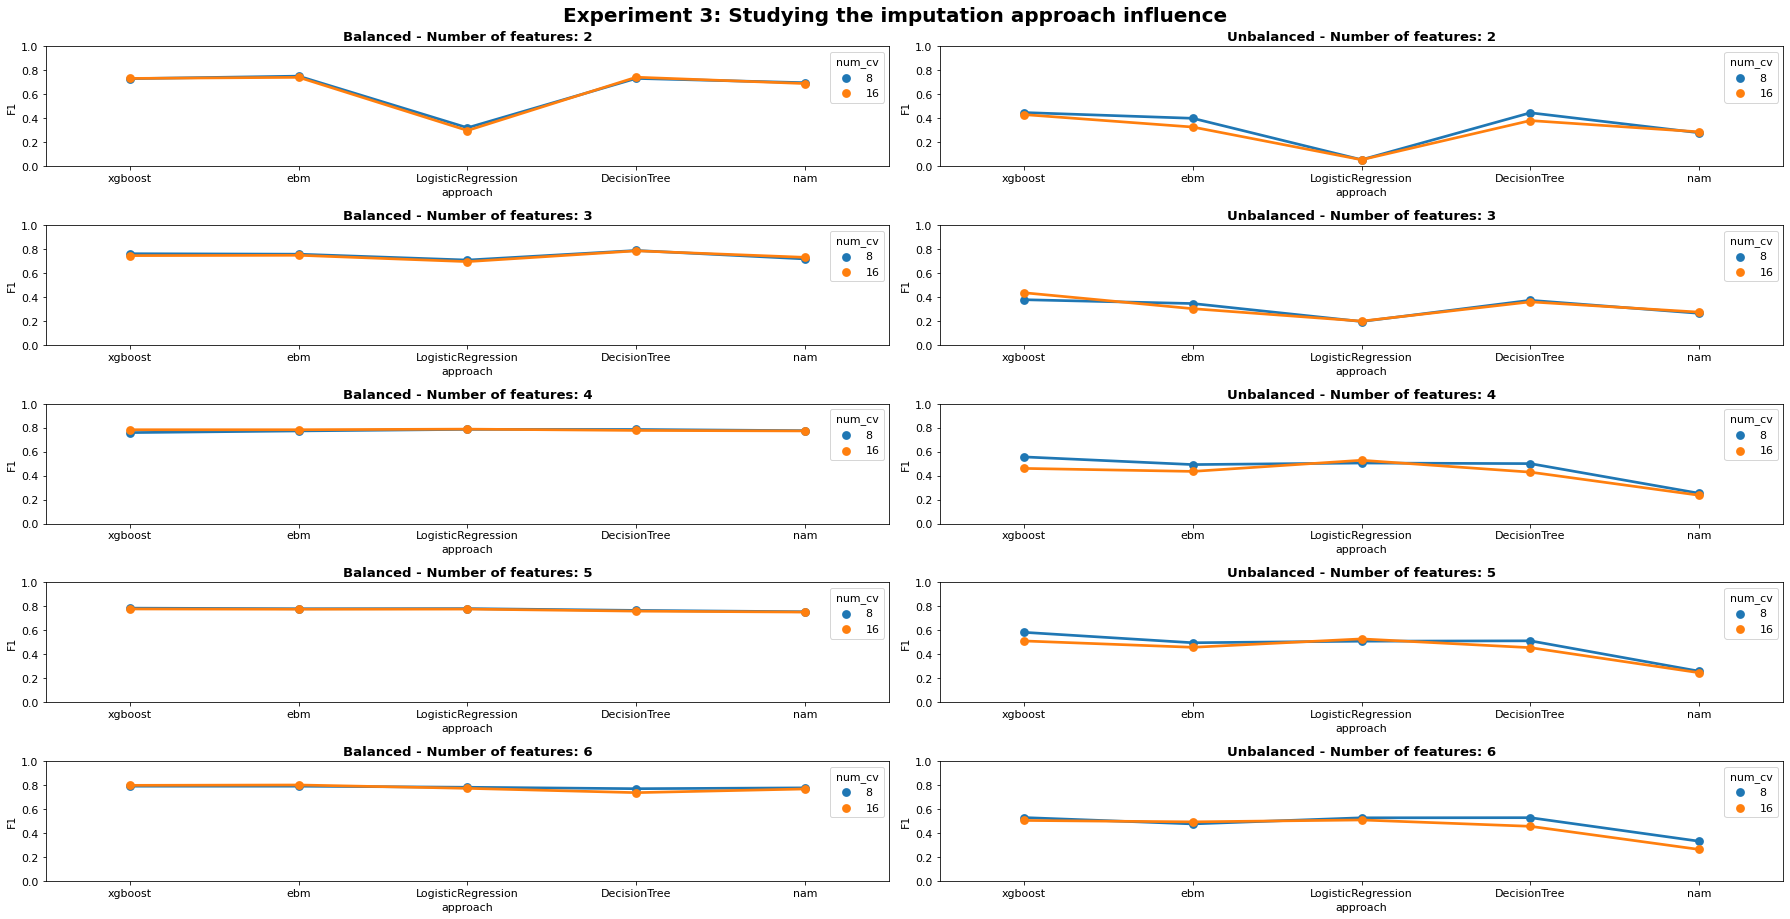

In [248]:
fig, axes = plt.subplots(5, 2, figsize=(25, 13))
fig.suptitle("Experiment 3: Studying the imputation approach influence", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique(), reverse=False)):
    for j, (scenario, label) in enumerate(zip(['asd_td_age_matched_n_balanced', 'asd_td_age_matched_n_unbalanced'], ['Balanced', 'Unbalanced'])):

        results = df[(df['missing_data_handling'] == 'encoding') &
                     (df['use_missing_indicator_variables'] == False) &
                     (df['sampling_method'] == 'without') &
                     (df['scale_data'] == True) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]
        
        assert len(results) == 5*2

        axes[i][j] = sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1", hue='num_cv', ci='sd', ax = axes[i][j])
        axes[i][j].set_ylim([0,1])
        axes[i][j].set_title("{} - Number of features: {}".format(label, n_features), weight='bold')

    plt.tight_layout()

In [255]:
df.sort_values(by='F1')

for scenario, results in df.groupby('scenario'):
    print("\n\n\nScenatio: {}".format(scenario))
    display(results.sort_values(by=['F1'], ascending = False).head(10))




Scenatio: asd_td_age_matched_n_balanced


dataset_name  experiment_number approach missing_data_handling imputation_method                                      features_name  n_features  use_missing_indicator_variables  scale_data sampling_method                       scenario  num_samples  imbalance_ratio  ratio_of_missing_values  ratio_missing_per_class_0  ratio_missing_per_class_1  resolution  bandwidth  estimation_time  num_cv  auc  Accuracy     F1    MCC  Sensitivity  Specificity  Precision    PPV    NPV    FNR    FDR    FOR
3896  complete_autism               1703  xgboost            imputation               knn  ['S_postural_sway', 'mean_gaze_percent_right',...           6                            False        True           smote  asd_td_age_matched_n_balanced          237         0.926829                 0.165963                   0.098916                   0.238304          20        0.2         2.599746       8  NaN     0.819  0.817  0.639        0.842        0.797      0.793  0.793  0.845  0.158  0.207  0.155
2700  complete_autism               1503  xgboost            imputation               knn  ['S_postural_sway', 'mean_gaze_percent_right',...           6                            False        True         vanilla  asd_td_age_matched_n_balanced          237         0.926829                 0.165963                   0.098916                   0.238304          20        0.2         2.667968       8  NaN     0.819  0.817  0.639        0.842        0.797      0.793  0.793  0.845  0.158  0.207  0.155
3159  complete_autism               1303  xgboost            imputation               knn  ['S_postural_sway', 'mean_gaze_percent_right',...           6                            False        True         without  asd_td_age_matched_n_balanced          237         0.926829                 0.165963                   0.098916                   0.238304          20        0.2         2.613392       8  NaN     0.819  0.817  0.639        0.842        0.797      0.793  0.793  0.845  0.158  0.207  0.155
4200  complete_autism                893  xgboost            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True        True         vanilla  asd_td_age_matched_n_balanced          237         0.926829                 0.082982                   0.049458                   0.119152          20        0.2         9.416015      16  NaN     0.814  0.814  0.631        0.842        0.789      0.787  0.787  0.843  0.158  0.213  0.157
216   complete_autism               1093  xgboost            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True        True           smote  asd_td_age_matched_n_balanced          237         0.926829                 0.082982                   0.049458                   0.119152          20        0.2         6.773226      16  NaN     0.814  0.814  0.631        0.842        0.789      0.787  0.787  0.843  0.158  0.213  0.157
2951  complete_autism                693  xgboost            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True        True         without  asd_td_age_matched_n_balanced          237         0.926829                 0.082982                   0.049458                   0.119152          20        0.2         4.839285      16  NaN     0.814  0.814  0.631        0.842        0.789      0.787  0.787  0.843  0.158  0.213  0.157
4601  complete_autism                403  xgboost              encoding          constant  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True        True           smote  asd_td_age_matched_n_balanced          237         0.926829                 0.082982                   0.049458                   0.119152          20        0.2        13.631719       8  NaN     0.802  0.802  0.606        0.833        0.772      0.772  0.772  0.833  0.167




Scenatio: asd_td_age_matched_n_unbalanced


dataset_name  experiment_number      approach missing_data_handling imputation_method                                      features_name  n_features  use_missing_indicator_variables  scale_data sampling_method                         scenario  num_samples  imbalance_ratio  ratio_of_missing_values  ratio_missing_per_class_0  ratio_missing_per_class_1  resolution  bandwidth  estimation_time  num_cv  auc  Accuracy     F1    MCC  Sensitivity  Specificity  Precision    PPV    NPV    FNR    FDR    FOR
3983  complete_autism                687  DecisionTree            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True        True         without  asd_td_age_matched_n_unbalanced          297             0.32                 0.044052                   0.029630                   0.089120          20        0.2         0.007466       8  NaN     0.818  0.667  0.550        0.750        0.840      0.600  0.600  0.913  0.250  0.400  0.087
3394  complete_autism                887  DecisionTree            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True        True         vanilla  asd_td_age_matched_n_unbalanced          297             0.32                 0.044052                   0.029630                   0.089120          20        0.2         0.007761       8  NaN     0.818  0.667  0.550        0.750        0.840      0.600  0.600  0.913  0.250  0.400  0.087
3528  complete_autism               1087  DecisionTree            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True        True           smote  asd_td_age_matched_n_unbalanced          297             0.32                 0.044052                   0.029630                   0.089120          20        0.2         0.007076       8  NaN     0.818  0.667  0.550        0.750        0.840      0.600  0.600  0.913  0.250  0.400  0.087
1331  complete_autism               3567  DecisionTree            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True       False           smote  asd_td_age_matched_n_unbalanced          297             0.32                 0.044052                   0.029630                   0.089120          20        0.2         0.007493       8  NaN     0.808  0.632  0.506        0.681        0.849      0.590  0.590  0.893  0.319  0.410  0.107
140   complete_autism               3367  DecisionTree            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True       False         vanilla  asd_td_age_matched_n_unbalanced          297             0.32                 0.044052                   0.029630                   0.089120          20        0.2         0.007474       8  NaN     0.808  0.632  0.506        0.681        0.849      0.590  0.590  0.893  0.319  0.410  0.107
4770  complete_autism               3167  DecisionTree            imputation              mice  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True       False         without  asd_td_age_matched_n_unbalanced          297             0.32                 0.044052                   0.029630                   0.089120          20        0.2         0.007915       8  NaN     0.808  0.632  0.506        0.681        0.849      0.590  0.590  0.893  0.319  0.410  0.107
1222  complete_autism               3967  DecisionTree            imputation               knn  ['S_postural_sway', 'mean_gaze_percent_right',...           6                             True       False         vanilla  asd_td_age_matched_n_unbalanced          297             0.32                 0.044052                   0.029630                   0.089120          20        0.2         0.007267       8  NaN     0.805  0.613  0.484  